# Analyzing and Predicting the IMDb top 250 Movies from 1996-2020


### John Tayag

<a id="Top_of_page"></a>


*Quick links*

[Data analysis: Movies](#movies)
* [Genre](#genre)
* [Release Date vs IMDb Year](#year)
* [Gross](#gross)
* [Ratings/Score](#ratings)
* [Votes](#votes)

[Data analysis: Actors/Directors](#people)
* [Actors](#actors)
* [Directors](#directors)

[Machine learning](#ML)
* [5 equal-width bins](#5)
* [Top 10-50-100-250](#top10)

[Unused Code](#unused)

# Intro

## Background

[IMDb](#https://www.imdb.com/?ref_=nv_home) (Internet Movie Database) is an online database that lists details on multiple forms of visual media, most notably films and TV shows, and hosts millions of users. The details listed include casts, production crew, and plot summaries, as well as both critical reviews and user ratings. Using this information, IMDb maintains a list of the highest rated 250 movies updated constantly as new reviews are submitted.

Using a dataset uploaded by Mustafa Cicek on Kaggle, I would like to analyze the top 250 movies over the years to try answer a few questions:

* What features make a popular movie?
* How have movies changed over the years?
* Which actors and directors have had the most success over the years?

I will also build a model to try and predict whether or not a movie a movie will be considered popular (as in, how high on the list will the movie be ranked?). I will detail this further in the machine learning section.


## Dataset

[Link to the dataset](#https://www.kaggle.com/mustafacicek/imdb-top-250-lists-1996-2020)

The dataset was compiled and uploaded by Mustafa Cicek from Kaggle, and the information was scraped from IMDb using Beautiful Soup. As the top 250 list is constantly changing, the data from each year was extracted at midnight of December 31st (PST) to reflect the final rankings of that year.

There are 6250 rows (25 years of top 250 movies), and there are 16 features:

1. **Ranking**: The ranking of a movie in a given year
2. **IMDbyear**: The year for a given Top 250 list
3. **IMDBlink**: The movie's IMDb url
4. **Title**: Title of the movie
5. **Date**: Movie's release date
6. **RunTime**: Total runtime of the movie (in minutes)
7. **Genre**: Different genres the movie flls under
8. **Rating**: The IMDb score of the movie - a weighted average of IMDb user ratings
9. **Score**: The metascore of the movie - a weighted average of professional critical reviews
10. **Votes**: Total # of votes on IMDb for a movie
11. **Gross**: Total gross of a movie (in millions of dollars)
12. **Director**: Director of the movie
13. **Cast1**: Performer 1 for a movie
14. **Cast2**: Performer 2 for a movie
15. **Cast3**: Performer 3 for a movie
16. **Cast4**: Performer 4 for a movie

While individual user preferences and movie qualities may differ greatly, these features are broad enough to allow for a relatively non-biased analysis.

# Data Analysis

## Movies

<a id='movies'></a>

First, I will visualize some key features to try to understand the data:

For each year, find the top 5 movie genres
Overall, find the top 5 movie genres



In [1]:
### View the original data frame

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

imdb_df = pd.read_csv("imdbTop250.csv")

imdb_df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1254781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2407245,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,645186,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Mystery, Thriller",8.5,77.0,1010775,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,51747,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


In [2]:
### Quick look at various statistics
imdb_df.describe()

,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
count,6250.00000,6250.00000,6250.000000,6250.000000,6250.000000,5399.000000,6.250000e+03,5465.000000
mean,125.50000,2008.00000,1978.313120,125.507200,8.167728,84.304316,4.615469e+05,70.185208
std,72.17398,7.21168,23.509933,30.899116,0.329375,10.060331,4.533022e+05,101.989895
min,1.00000,1996.00000,1920.000000,16.000000,5.500000,61.000000,8.906000e+03,0.010000
25%,63.00000,2002.00000,1959.000000,105.000000,8.000000,77.000000,1.141480e+05,5.380000
50%,125.50000,2008.00000,1983.000000,121.000000,8.100000,85.000000,2.881270e+05,26.240000
75%,188.00000,2014.00000,1998.000000,138.000000,8.300000,92.000000,7.076660e+05,90.140000
max,250.00000,2020.00000,2020.000000,321.000000,9.300000,100.000000,2.407245e+06,936.660000


**Important values to note:**

* There are missing values in the **score** (5399/6250) and the **gross** (5465/6250) columns.
    * These are only the numeric columns so there could be more missing values in other columns
* The average release date is **1978** with a standard deviation of **23.5 years**. Considering how the data covers IMDb rankings from 1980-2020, this reveals that many movies on each list were released prior to the year they were ranked.
    * Notably the earliest movie was released in 1920.
* Average movie earnings vary wildly, from the lowest at **\\$10,000** to the highest at **\\$936.66 million**.
* Average vote counts also vary wildly, from the lowest at **8906** to the highest at **2,407,245**.

In [121]:
### Quick look at the data types of each column
print(imdb_df.info())
print('\n')
### Number of unique values
print(imdb_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6250 non-null   int64  
 1   IMDByear  6250 non-null   int64  
 2   IMDBlink  6250 non-null   object 
 3   Title     6250 non-null   object 
 4   Date      6250 non-null   int64  
 5   RunTime   6250 non-null   int64  
 6   Genre     6250 non-null   object 
 7   Rating    6250 non-null   float64
 8   Score     5399 non-null   float64
 9   Votes     6250 non-null   int64  
 10  Gross     5465 non-null   float64
 11  Director  6250 non-null   object 
 12  Cast1     6250 non-null   object 
 13  Cast2     6250 non-null   object 
 14  Cast3     6242 non-null   object 
 15  Cast4     6242 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 781.4+ KB
None


Ranking     250
IMDByear     25
IMDBlink    733
Title       732
Date        100
RunTime     140
Genre       197
Rating  

**Important values to note**

* There are 732 movies out of 6250 total instances, meaning there are **many** repeat movies.
* There are 100 unique dates, meaning these movies span an entire century.
* There are 477 Cast1 values, a much smaller set than all other Cast categories
    * Cast1 will likely be a better predictor of a good movie than the other cast categories as there are less values that divide the data

<a id="genre"></a>

## **Genre**

* There are 197 genre values in the data, but many instances have multiple genres tagged in this category
    * For example, the movie Star Wars is listed as "Action, Adventure, Fantasy" as a combined genre category
    * This means "Drama" is classed differently from "Drama, Fantasy", and "Drama, Fantasy, Action"
* For a more accurate distribution of genres, I split each combined genre into its respective sub-categories


In [5]:
### Example of a movie with a combined genre value
print('Star Wars is listed as', list(imdb_df[ imdb_df['Title'] == 'Star Wars'].head(1)['Genre']) )

Star Wars is listed as ['Action, Adventure, Fantasy']


In [6]:
### Create function that counts how many times an item appears in the data frame

def split_store_unique(input_df, colname, sep):
    #For a column where the genre values consist of 1 OR MORE items, this function will parse through all values and save
    #the individual values with the number of times each are called out individually
    #
    #Output is a DF where each value is stored  with the # of times it appears in the original column individually
    
    
    # Initialize dictionary of genre values for output (col_dict)
    # Extract all values from the genre column (col_vals)
    col_dict = {}
    col_vals = input_df[colname].str.split(sep)
    
    # Loop through all genre combinations, split into individual values, strip white spaces, then add to output dictionary
    for instance in col_vals:
        for value in instance:
            value = value.lstrip()
            value = value.rstrip()
            col_dict[value] = col_dict.get(value, 0) + 1
    
    # Create output data frame from the dictionary
    output_df = pd.DataFrame(col_dict.items())
    
    # Format the output data frame accordingly, then return the output data frame
    output_df.rename(columns = {0: colname, 1: 'Count'}, inplace = True)
    output_df.sort_values('Count', ascending = False, inplace = True)
    output_df = output_df.reset_index().drop(columns = 'index', axis=1)
    
    return output_df

In [122]:
### Finding number of unique genre categories from the genre column
genre_df = split_store_unique(imdb_df, 'Genre', ', ')

total_genre_num = genre_df['Genre'].nunique()
genre_list = genre_df['Genre'].copy()

# Print the number of genres and display the last 13
print('There are {} different movie genres:'.format(total_genre_num))

genre_df

There are 23 different movie genres:


,Genre,Count
0,Drama,4309
1,Crime,1380
2,Adventure,1281
3,Comedy,1250
4,Action,938
5,Thriller,937
6,Romance,794
7,Mystery,783
8,Biography,605
9,Sci-Fi,511


There are **23** different movie genres represented in the data

The most common movie genre is **Drama** with a whopping **4309 movies** on all top 240 lists, followed by Crime (1380), Adventure (1281), and Comedy (1250).

The least common movie genre is **Documentary** with only **2 movies**, followed by Short (14), Musical (71), and Music (102).

Note, however, that this only reflects the prevalence of each category individually - many movies on the list are of a combination of genres

C:\Users\johnt\AppData\Local\Temp\ipykernel_29124\3921659732.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  genre_top = genre_df[genre_df['Count'] == genre_df.nlargest(1, 'Count') ]


Text(0.5, 0, '# of associated movies')

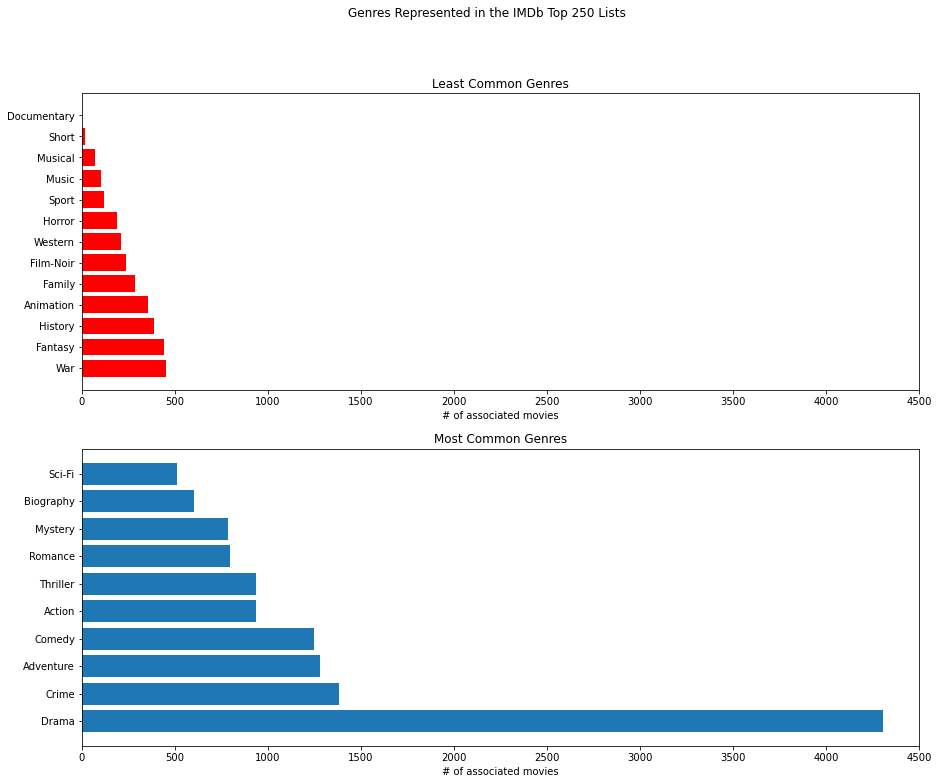

In [9]:
### Plot bar charts of the most/least common genre categories

genre_high = genre_df.head(10)
genre_low = genre_df.tail(total_genre_num - 10)
genre_top = genre_df[genre_df['Count'] == genre_df.nlargest(1, 'Count') ] 

f, (ax1, ax2) = plt.subplots(2, 1)

ax2.barh(list(genre_high['Genre']), list(genre_high['Count']) )
ax1.barh(list(genre_low['Genre']), list(genre_low['Count']), color = 'r' )
        
f.set_figwidth(15)
f.set_figheight(12)

ax1.set_xlim(0, 4500)
ax2.set_xlim(0,4500)
plt.suptitle('Genres Represented in the IMDb Top 250 Lists')
ax1.set_title('Least Common Genres')
ax2.set_title('Most Common Genres')
ax1.set_xlabel('# of associated movies')
ax2.set_xlabel('# of associated movies')
#ax1.legend()

#f.savefig('Least_Most_Genres_in_Top250')

The following chart shows the genre breakdown for the top 10 movies across all top 250 lists in the data

<AxesSubplot:title={'center':'Individual Genre Breakdown'}, xlabel='Genre'>

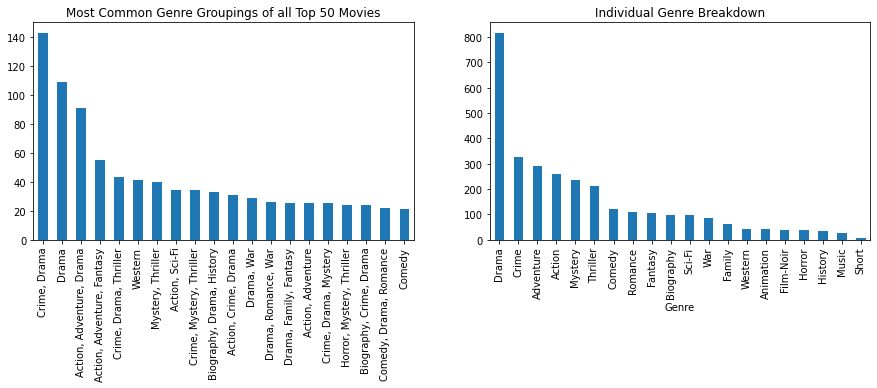

In [10]:
### Similar code to above, except using Pandas to plot the bars instead of matplotlib

# Finding the genres represented in all top 50 movies without duplicates
imdb_top10s = imdb_df[ imdb_df['Ranking'] < 51].drop_duplicates()
genre = imdb_top10s['Genre']

# Finding the individual genre distribution
genre_temp = split_store_unique(imdb_top10s, 'Genre', ', ')
genre_individual = pd.Series(data = genre_temp.Count.values, index = genre_temp.Genre)

f, axes = plt.subplots(1,2)

f.set_figwidth(15)
# Only showing top 20 results to avoid crowding the chart
genre.value_counts().head(20).plot(kind = 'bar', ax=axes[0], title = 'Most Common Genre Groupings of all Top 50 Movies')
genre_individual.head(20).plot(kind = 'bar', ax=axes[1], title = 'Individual Genre Breakdown')

#f.savefig('Top10_Genres_Individual_Breakdown')

### What genres make a popular movie?

Clearly, drama movies dominate the charts being represented by over 4000 movies on the IMDb top 250 movies in the dataset. This trend is also reflected when looking specifically at only the top 10 movies. **Crime dramas** are particularly popular with over 70 movies out of a total of 250, but over 40 specifically **drama** movies are also included. When looking at the individual genre breakdown, **drama** once again dominates with over 200 movies, though **crime** also has a significant share with almost 100 movies. 

**Action** and **Adventure** movies are the next most popular movie genres overall. While **Comedy** movies are highly represented in the top 250 lists, they are among the least represented in the top 10 lists, implying that comedies rarely outrank the other popular movie genres overall.

## Genres over time

To get a sense of how popular movie genre preferences have changed over time, I will plot the 10 most common genres each year, first as percentages of the total each year, and second as the totals themselves.

In [123]:
### Get and plot the top num genres represented each year
num = 10 # How many genres to keep from each year
stack_genre = pd.DataFrame() # DF of genres from each year
stack_count = pd.DataFrame() # DF of respective genre counts from each year
genres_topnumset = set() # Keeping track of all genres that made the top 10 from any given year


# For each year, store the top 10 most common genres and respective counts
for year in range(1996,2021):
    # Finding number of unique genre categories
    year_df = imdb_df[ imdb_df['IMDByear'] == year ]
    
    yearly_genre_df = split_store_unique(year_df, 'Genre', ',')

    genrenum = yearly_genre_df.loc[0:num-1, 'Genre']
    countnum = yearly_genre_df.loc[0:num-1, 'Count']

    genres_topnumset.update(set(genrenum))

    stack_genre[str(year)] = genrenum
    stack_count[str(year)] = countnum

# Form dataframe with genre as column names, year as indices, counts as datapoints
genres_topnum = list(genres_topnumset)
yearly_genres = pd.DataFrame()
years = range(1996,2021)
#genre_row = pd.Series()

# Loop through all genres that made the top 10 in any given year
for i, genre in enumerate(genres_topnum):
    genre_row = list()

    # Loop through all years in the data set, then add the count from that year to the genre's column
    for year in years:
        countval = list(stack_count.loc[ stack_genre[str(year)] == genre, str(year)])

        if len(countval) == 0: # If genre was not in the top 10 of a given year, default to 0
            countval = 0

        else:
            countval = countval.pop()

        genre_row.append(countval)

    yearly_genres[str(genre)] = genre_row

yearly_genres['Years'] = years
yearly_genres.set_index('Years', inplace=True)
#print('These are the top {} genres represented in each year\'s top 250 with the number of associated movies'.format(num))

#yearly_genres

Text(0.5, 1.0, 'The 10 Most Prevalent Movie Genres Each Year From 1980-2020')

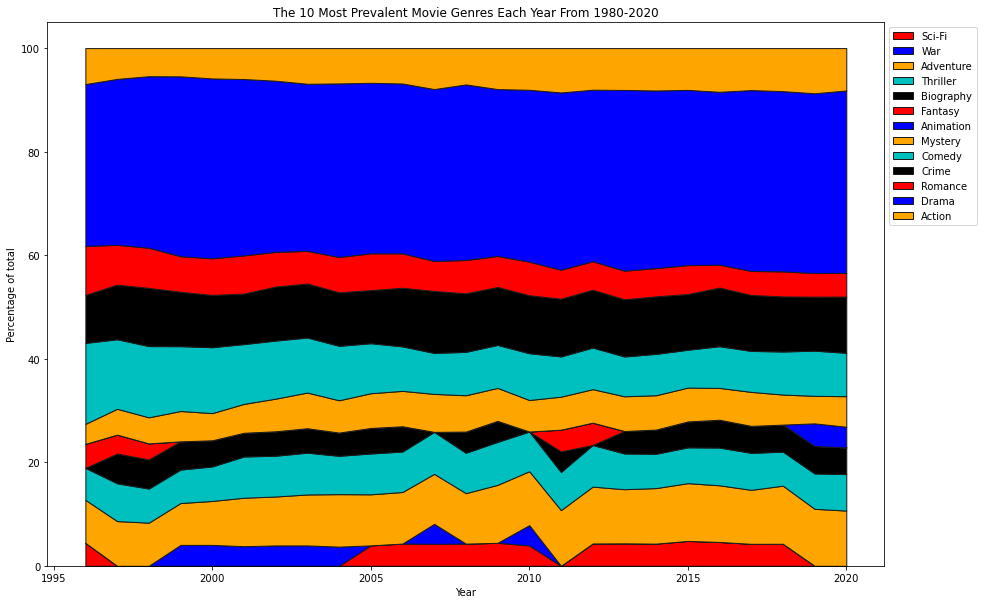

In [124]:
### Plot the top 10 genres for each year with respective percentages
fig = plt.figure(figsize = (15, 10))
colors = ['r', 'b', 'orange', 'c', 'k']
labels = genres_topnum
a = yearly_genres.copy()
a_percent = ( a.T / a.T.sum() ) * 100

plt.stackplot(years, a_percent, colors=colors, labels=labels, edgecolor = '.1')

plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Percentage of total')
plt.title('The {} Most Prevalent Movie Genres Each Year From 1980-2020'.format(num))

#fig.savefig('20_most_prevalent_movie_genres')

### Important things to note:

* By far, **Drama** is the largest, most consistently present genre throughout the years
    * **Crime, Thriller, Adventure, Comedy,** and **Action** also have a consistent presence
    ** Mystery, Biography, and Romance movies have a smaller but also fairly consistent presence
* A few genres are not consistently present:
    * War movies appeared around the 2000s but have since been less frequent on the list
    * There was a bried period of fantasy movies in the early 2010s
    * The first animation movies to appear on the list were in the late 2010s
    * Sci-Fi movies didn't make the list between 1996 and 2004, but have since appeared frequently
    

Text(0.5, 1.0, 'The 10 Most Prevalent Movie Genres in New Movies Each Year From 1980-2020')

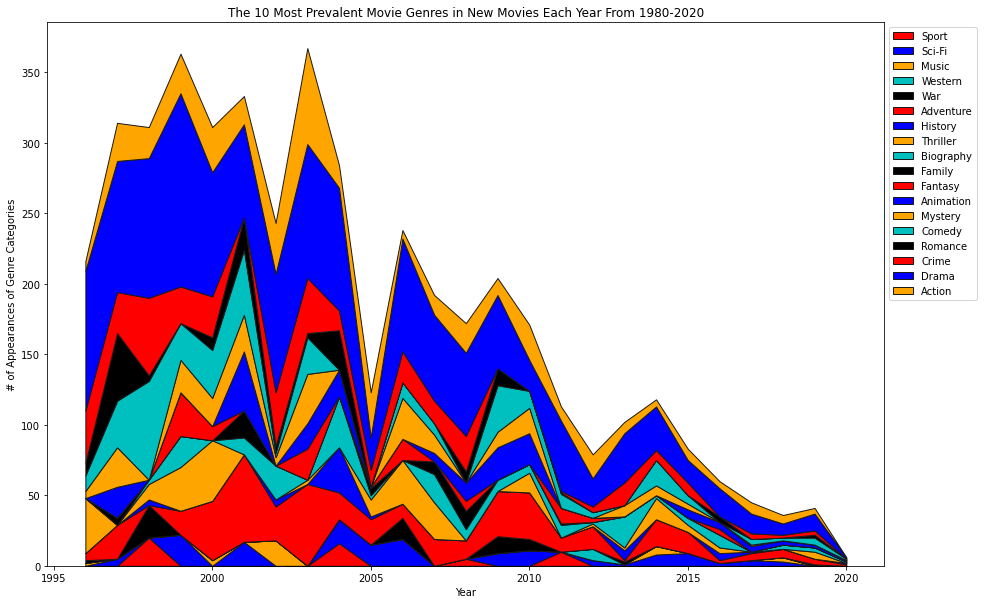

In [125]:
# CODE IS THE SAME EXCEPT FOR ADDING A FILTER FOR RELEASE DATE AND NOT CONVERTING a TO PERCENTAGES
num = 10
stack_genre = pd.DataFrame()
stack_count = pd.DataFrame()
genres_topnumset = set()

for year in range(1996,2021):
    # Finding number of unique genre categories
    year_df = imdb_df[ imdb_df['IMDByear'] == year ]
    year_df = imdb_df[imdb_df['Date'] == year] #########################
    
    yearly_genre_df = split_store_unique(year_df, 'Genre', ',')

    genrenum = yearly_genre_df.loc[0:num-1, 'Genre']
    countnum = yearly_genre_df.loc[0:num-1, 'Count']

    genres_topnumset.update(set(genrenum))

    stack_genre[str(year)] = genrenum
    stack_count[str(year)] = countnum


# Form dataframe with genre as column names, year as indices, counts as datapoints
genres_topnum = list(genres_topnumset)
yearly_genres = pd.DataFrame()
years = range(1996,2021)
#genre_row = pd.Series()

for i, genre in enumerate(genres_topnum):
    genre_row = list()

    for year in years:
        countval = list(stack_count.loc[ stack_genre[str(year)] == genre, str(year)])

        if len(countval) == 0:
            countval = 0

        else:
            countval = countval.pop()

        genre_row.append(countval)

    yearly_genres[str(genre)] = genre_row

yearly_genres['Years'] = years
yearly_genres.set_index('Years', inplace=True)

fig = plt.figure(figsize = (15, 10))
colors = ['r', 'b', 'orange', 'c', 'k']
labels = genres_topnum
a = yearly_genres.copy()
#a_percent = ( a.T / a.T.sum() ) * 100

plt.stackplot(years, a.T, colors=colors, labels=labels, edgecolor = '.1')

plt.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('# of Appearances of Genre Categories')
plt.title('The {} Most Prevalent Movie Genres in New Movies Each Year From 1980-2020'.format(num))

#fig.savefig('Most_Prevalent_5_genres')

### Important things to note:

This chart is harder to understand, but essentially it plots the 10 most prevalent movie genres each yearas totals instead of percentages. I will explore this next, but the plot indicates that there are less new movies contributing to the genre count with each passing year, implying that there are less new movies appearing on the IMDb list each year.

<a id='year'></a>
## Release Date vs IMDb Year

This analysis will give an idea of how many new movies are making the IMDb top 250 lists versus old movies

Year with most new movies:
1996 with 23 new movies on the IMDb top 250


Year with least new movies:
2002 with 4 new movies on the IMDb top 250


2020 had only 2 new movies on the IMDb top 250


Text(0, 0.5, '# of Movies')

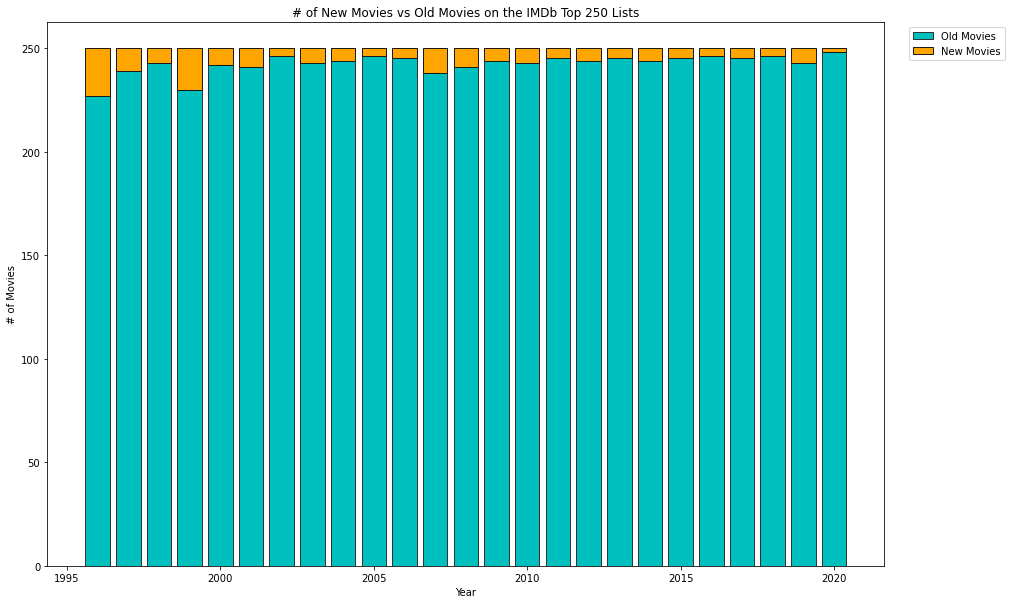

In [126]:
### Find the number of new movies that made the top 250 for each year

# Extract the IMDByear and Date columns --> If Date = IMDByear, then the movie was released that year
date_df = imdb_df[['IMDByear', 'Date']]

# Set up the chart to plot using the for loop
fig = plt.figure(figsize = (15, 10))
labels = ['Old Movies', 'New Movies']
current_tracker = list() # The number of new movies for each year
year_list = range(1996, 2021)

# Loop through each year
for year in year_list:
    # Extract the data for the given year
    yearly_date_df = date_df[ date_df['IMDByear'] == year].reset_index().drop(columns = 'index', axis=1)
    #print(yearly_date_df.head())
    
    # Sum up the number of movies newly released for the given year
    current = sum(yearly_date_df[ yearly_date_df['IMDByear'] == yearly_date_df['Date']]['Date'].value_counts())
    current_tracker.append(current)
    
    # Sum up the number of movies previously released for the given year
    past = sum(yearly_date_df[ yearly_date_df['IMDByear'] != yearly_date_df['Date']]['Date'].value_counts())
    
    # Plot both new and old movies for the given year
    plt.bar(year, past, color = 'c', edgecolor = '.2')
    plt.bar(year, current, bottom = past, color = 'orange', edgecolor = '.1')

# Record the index of the year with the most new releases and extract the year
current_max = max(current_tracker)
current_max_year = year_list[current_tracker.index(current_max)]

# Record the index of the year with the least new releases and extract the year
# Not including 2020 as COVID impacted the industry heavily that year (call out its value separately)
current_min = min(current_tracker[0:len(current_tracker)-1])
current_min_year = year_list[current_tracker.index(current_min)]

print('Year with most new movies:\n{} with {} new movies on the IMDb top 250'.format(current_max_year, current_max))
print('\n')
print('Year with least new movies:\n{} with {} new movies on the IMDb top 250'.format(current_min_year, current_min))
print('\n')
print('2020 had only {} new movies on the IMDb top 250'.format(current_tracker[len(current_tracker)-1]))

plt.legend(labels = labels, loc = 'upper right', bbox_to_anchor = (1.15,1))
plt.title('# of New Movies vs Old Movies on the IMDb Top 250 Lists')
plt.xlabel('Year')
plt.ylabel('# of Movies')

#fig.savefig('new_vs_old_movies')

Equation:  
-0.1594 x + 323
Correlation coefficient (x): -0.61


Text(0.5, 1.0, 'Percentage of each IMDb list that are New Movies')

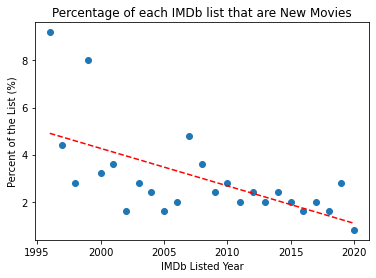

In [127]:
# Looking at the ratio of new vs old movies per year

perc_new = date_df.copy()
perc_new.loc[:,'movie_type'] = 0
perc_new.loc[perc_new['IMDByear'] == perc_new['Date'], 'movie_type'] = 1
perc_new = (perc_new[['IMDByear', 'movie_type']].groupby('IMDByear').sum()/250) * 100

z = np.polyfit(perc_new.index, perc_new['movie_type'], 1)
p = np.poly1d(z)
corr = np.round(np.corrcoef(perc_new.index, perc_new['movie_type']), 2)

print(f'Equation: {p}')
print(f'Correlation coefficient (x): {corr[0,1]}')

plt.scatter(perc_new.index, perc_new['movie_type'])
plt.plot(perc_new.index, p(perc_new.index), 'r--')
plt.xlabel('IMDb Listed Year')
plt.ylabel('Percent of the List (%)')
plt.title('Percentage of each IMDb list that are New Movies')

### Analysis

There is a definite downward trend of the number of new movies appearing on yearly IMDb Top 250 lists as time passes. **1996** had the most with **23** new movies, while **2002** had the least with only **4** (excluding 2020).

**2020** actually had the least with only **2** new movies on the IMDb top 250 list, but considering the COVID-19 pandemic's impact on the movie industry during that year, this number may have been affected. There is a notable jump in the number of new movies in 2019, so maybe this trend would have started reversing.

<a id="gross"></a>

## Gross

I will compare some of the highest grossing movies to some of the lowest grossing movies. I will use the mean grossing overall to aid in this comparison, so first I will drop any movies with a missing Gross value.

In [129]:
# Checking for NA values in the Gross column
gross_na = imdb_df[imdb_df['Gross'].isnull() == True]
print('These movies have N/A Gross values - there are {} total'.format(gross_na.shape[0]))
gross_na[['Ranking', 'Title', 'Gross']].head()

These movies have N/A Gross values - there are 785 total


,Ranking,Title,Gross
4,5,The Wrong Trousers,NaN
5,6,A Close Shave,NaN
46,47,It's a Wonderful Life,NaN
50,51,To Kill a Mockingbird,NaN
79,80,Dip huet seung hung,NaN


Average gross: $70.19 million


Text(0.5, 1.0, 'Highest Grossing Movies on the IMDb Top 250 Lists')

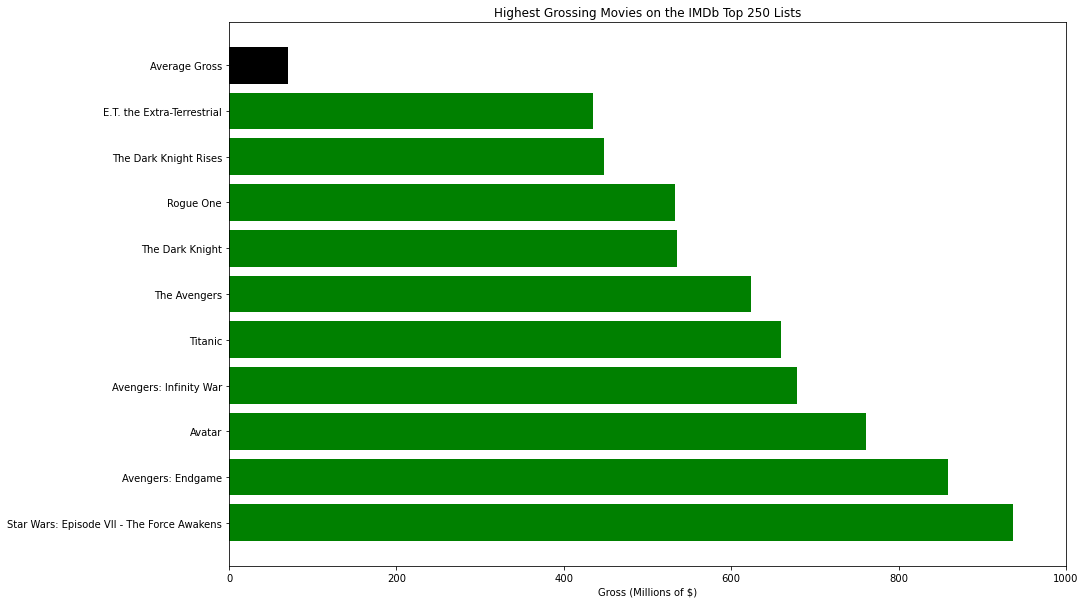

In [17]:
# Remove all rows with N/A Gross values
gross_imdb = imdb_df[imdb_df['Gross'].isnull() == False]
mean_gross = gross_imdb['Gross'].mean() # Average gross for all movies

# Record the highest grossing movies
gross_high = gross_imdb.drop_duplicates('Title').nlargest(100,'Gross')
gross_high.loc[:,'type'] = 1
gross_high_10 = gross_high.head(10)
gross_high_x = list(gross_high_10['Title'])
gross_high_y = list(gross_high_10['Gross'])

# Record the lowest grossing movies
gross_low = gross_imdb.drop_duplicates('Title').nsmallest(100,'Gross')
gross_low.loc[:,'type'] = 0
gross_low_10 = gross_low.head(10)
gross_low_x = list(gross_low_10['Title'])
gross_low_y = list(gross_low_10['Gross'])

# Print the average gross
print('Average gross: ${} million'.format(round(mean_gross, 2)) )

# Plot the highest grossing movies with the average gross in black
fig = plt.figure(figsize=(15,10))
plt.barh(gross_high_x, gross_high_y, color = 'g')
plt.barh('Average Gross', mean_gross, color='k')

plt.xlim(0,1000)
plt.xlabel('Gross (Millions of $)')
plt.title('Highest Grossing Movies on the IMDb Top 250 Lists')

#fig.savefig('highest_grossing_movies')

Average gross: $70.19 million


Text(0.5, 1.0, 'Lowest Grossing Movies on the IMDb Top 250 Lists')

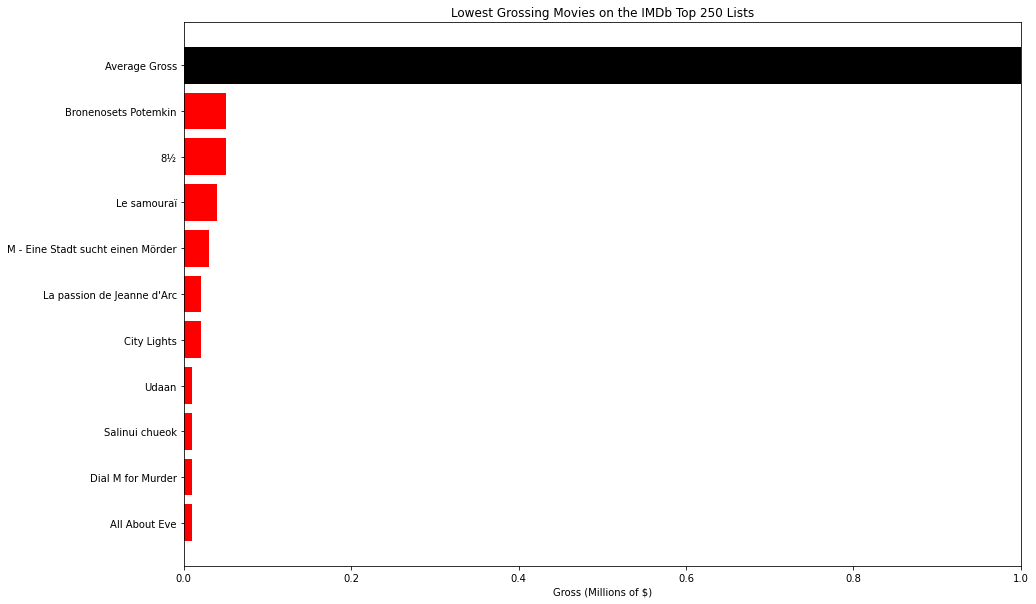

In [18]:
# Print the average gross
print('Average gross: ${} million'.format(round(mean_gross, 2)) )

# Plot the lowest grossing movies with the average gross in black
fig = plt.figure(figsize=(15,10))

f = plt.barh(gross_low_x, gross_low_y, color = 'r')
plt.barh('Average Gross', mean_gross, color='k')

plt.xlim(0,1)
plt.xlabel('Gross (Millions of $)')
plt.title('Lowest Grossing Movies on the IMDb Top 250 Lists')

#fig.savefig('lowest_grossing_movies')

The highest grossing movies include some of the most major modern movies, including **Star Wars: The Force Awakens**, **Avengers: Endgame**, and **Avatar**. All three of these movies broke the *\\$700 million* mark. The lowest grossing movies are much smaller in scale and don't come even close to breaking the *\\$1 million* mark. These include some small films such as **All About Eve** and **Dial M for Murder**, as well as some foreigh films like **Udaan** and **Le samourai**.

The average gross was about *\\$70 million* - notably, this bar extends well beyond any useful range on the lowest grossing movie chart.

To see how much of an impact the gross value has on the ranking, I will these same movies against their corresponding rankings.

The lowest grossing movies (in <font color='red'>red</font>) were fairly uniformly spread across the entire 250 list while the the highest grossing movies (in <font color='blue'>blue</font>) were mostly located in the top 100 range. The average low gross movie ranked around 130th while the average high gross movie ranked around 76th.

This trend is pretty clear across all movies:

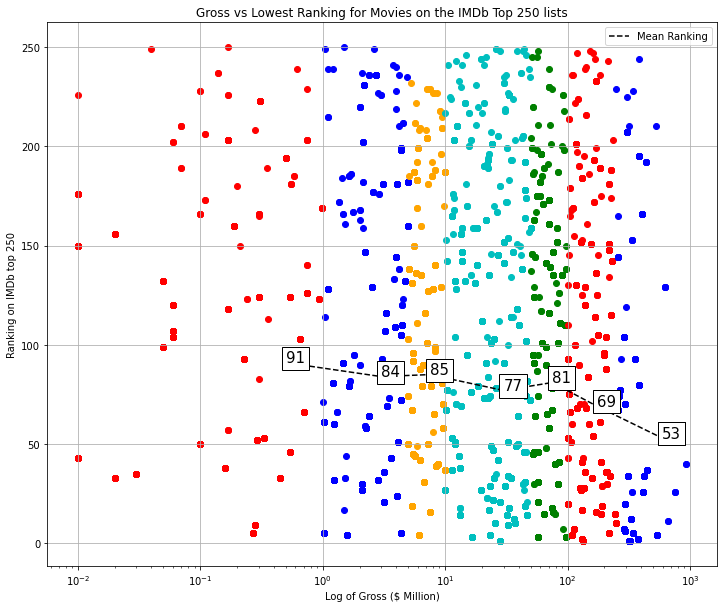

In [130]:
# Plotting average rankings for different gross categories (Binned categories according to gross)

# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
# Initialize data frame 
gross_all = gross_imdb[['Title', 'Gross']].copy()

for movie in movielist:
    condition = gross_all['Title'] == movie
    gross_all.loc[condition, 'best_rank'] = gross_imdb.loc[gross_imdb['Title'] == movie, 'Ranking'].min()

# Manual binning into less than 10 million, 10 mill - 50 mill, 50-100mill, 100-250 mill, over 250 mill
manual_bins = [0, 1, 5, 10, 50, 100, 250, gross_all['Gross'].max()]
bin_num = len(manual_bins)
gross_all['bins'] = np.digitize(gross_all['Gross'], bins = manual_bins, right = True)

# Find the mean rankings and a set of x values to overlay onto the plot
bins_gross_meanrank = [int(value) for value in list(gross_all.groupby('bins').mean()['best_rank'])]
xvalues = [(manual_bins[i] + manual_bins[i+1])/2 for i in range(0, len(manual_bins) - 1)]

# Initialize plotting parameters
fig = plt.figure(figsize = (12,10))
ax = plt.gca()
colors = ['r', 'b', 'orange', 'c', 'g', 'r', 'b', 'orange', 'c', 'g']
box = dict(facecolor = 'white')

left_edge = 0
right_edge = 0

# Plot the mean rankings
plt.plot(xvalues, bins_gross_meanrank, color = 'k', label = 'Mean Ranking', linestyle = '--')

# Plot all movies
for i in range(0, bin_num):
    #right_edge = bins_gross_meanrank[i]
    movies_binned = gross_all[gross_all['bins'] == i + 1]

    plot_movie_gross = list(movies_binned['Gross'])
    plot_movie_rank = list(movies_binned['best_rank'])

    plt.scatter(plot_movie_gross, plot_movie_rank, color = colors[i])

    # Label the mean ranking for this bin
    plt.text(xvalues[i-1], bins_gross_meanrank[i-1], str(bins_gross_meanrank[i-1]), fontsize = 15, bbox = box)

# Plot settings
plt.xlabel('Log of Gross (\\$ Million)')
plt.ylabel('Ranking on IMDb top 250')
plt.title('Gross vs Lowest Ranking for Movies on the IMDb Top 250 lists')
plt.xscale('log')
plt.legend()
plt.grid()

#fig.savefig('All_movie_gross_compare_low_vs_high')

<a id='ratings'></a>

## Ratings and Score

In [131]:
# Drop N/A score values and duplicate Title entries
review_temp = imdb_df[imdb_df['Score'].isnull() == False]
review_temp = review_temp[ review_temp['Rating'].isnull() == False]

# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
# Initialize data frame 
review_df = pd.DataFrame()

# Drop any duplicate title rows and create a workable data frame
for movie in movielist:
    movie_temp = review_temp[ review_temp['Title'] == movie]
    movie_temp = movie_temp[ movie_temp['Ranking'] == movie_temp['Ranking'].min()].head(1)
    # head(1) ensures only one entry

    review_df = pd.concat( [review_df, movie_temp])

print('There are {} movies in total with non-null Score/Rating values'.format(review_df['Title'].nunique()))

There are 532 movies in total with non-null Score/Rating values


Rating Correlation coefficient (x): -0.53
Score Correlation coefficient (x): -0.28


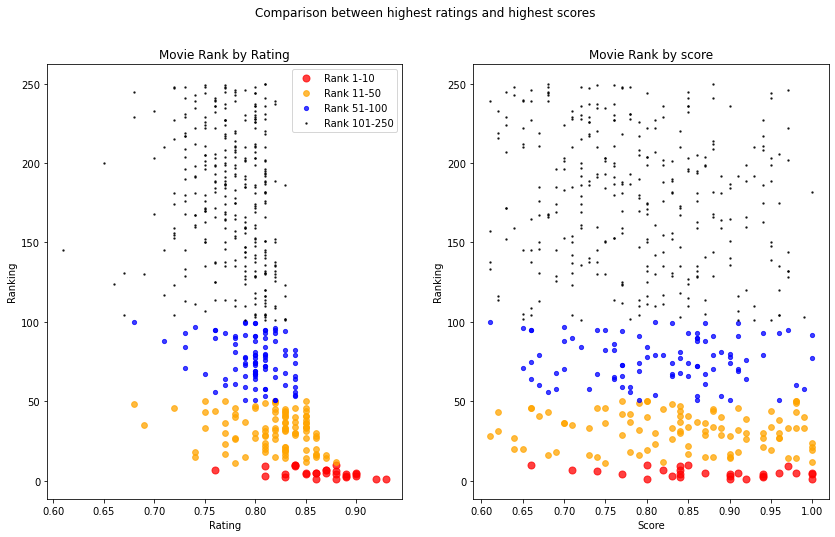

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2)


corr = np.round(np.corrcoef(review_df['Rating']/10, review_df['Ranking']), 2)
print(f'Rating Correlation coefficient (x): {corr[0,1]}')

corr = np.round(np.corrcoef(review_df['Score']/100, review_df['Ranking']), 2)
print(f'Score Correlation coefficient (x): {corr[0,1]}')

for i in range(1, bin_num):
    rating_df = review_df.loc[review_df['bins'] == i, ['Rating', 'Ranking']]
    score_df = review_df.loc[review_df['bins'] == i, ['Score', 'Ranking']]
    ax1.scatter(rating_df['Rating']/10, rating_df['Ranking'], color = colors[i-1], alpha = 0.75, s = size[i-1])
    ax2.scatter(score_df['Score']/100, score_df['Ranking'], color = colors[i-1], alpha = 0.75, s = size[i-1])

    
plt.suptitle('Comparison between highest ratings and highest scores')
ax1.set_title('Movie Rank by Rating')
ax2.set_title('Movie Rank by score')
ax1.set_ylabel('Ranking')
ax2.set_ylabel('Ranking')
ax1.set_xlabel('Rating')
ax2.set_xlabel('Score')
ax1.legend(['Rank 1-10', 'Rank 11-50', 'Rank 51-100', 'Rank 101-250'])
fig.set_figwidth(14)
fig.set_figheight(8)

<a id='votes'></a>
## Votes

In [132]:
# Drop N/A Vote values and duplicate Title entries
vote_temp = imdb_df[imdb_df['Votes'].isnull() == False]

# List all movies
movielist = list(gross_imdb['Title'].drop_duplicates())
# Initialize data frame 
vote_df = pd.DataFrame()

# Drop any duplicate title rows and create a workable data frame
for movie in movielist:
    movie_temp = vote_temp[ vote_temp['Title'] == movie]
    movie_temp = movie_temp[ movie_temp['Ranking'] == movie_temp['Ranking'].min()].head(1)
    # head(1) ensures only one entry

    vote_df = pd.concat( [vote_df, movie_temp])

print('There are {} total movies with non-null Vote values.'.format(len(vote_df)))

There are 633 total movies with non-null Vote values.


Votes Correlation Coefficient: -0.47


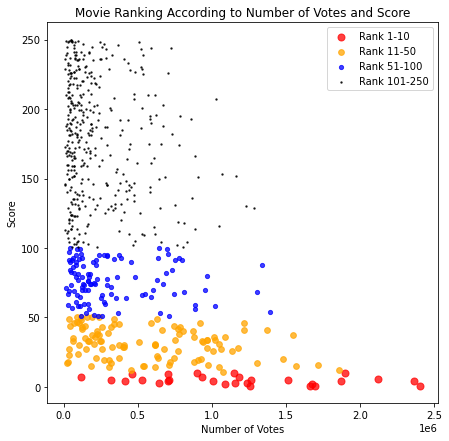

In [134]:
vr_data = vote_df[['Votes', 'Ranking']].copy()

rank_bins = [0, 10, 50, 100, 250]
bin_num = len(rank_bins)
vr_data['bins'] = np.digitize(vr_data['Ranking'], bins = rank_bins, right = True)

corr = np.round(np.corrcoef(vr_data['Votes'], vr_data['Ranking']), 2)
print(f'Votes Correlation Coefficient: {corr[0,1]}')

# Plotting
fig = plt.figure(figsize=(7,7))
colors = ['red','orange','blue','k']
size = np.linspace(bin_num*10 - 1, 2, bin_num - 1)


for i in range(1, bin_num):
    vr_bin = vr_data.loc[vr_data['bins'] == i, :] 
    plt.scatter(vr_bin['Votes'], vr_bin['Ranking'], s = size[i-1], alpha = 0.75, color = colors[i-1])

    
plt.title('Movie Ranking According to Number of Votes and Score')
plt.ylabel('Score')
plt.xlabel('Number of Votes')
plt.legend(['Rank 1-10', 'Rank 11-50', 'Rank 51-100', 'Rank 101-250'])

#fig.savefig('Compare_low_vs_high_ratings_and_scores')


Votes Correlation Coefficient: -0.47
Votes Correlation Coefficient: -0.47


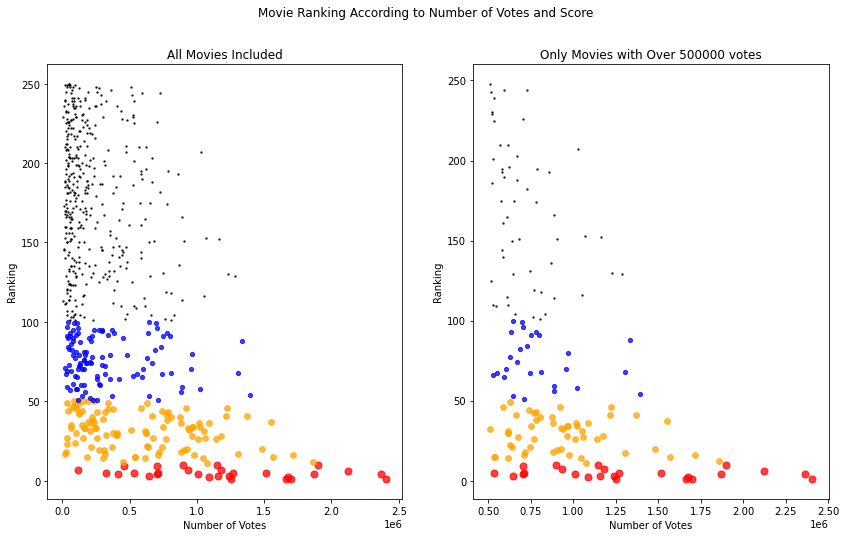

In [29]:
vote_threshold = 500000
vr_data = vote_df[['Votes', 'Ranking']].copy()
vr_data2 = vr_data[vr_data['Votes'] >= vote_threshold].copy()

rank_bins = [0, 10, 50, 100, 250]
bin_num = len(rank_bins)
vr_data['bins'] = np.digitize(vr_data['Ranking'], bins = rank_bins, right = True)
vr_data2['bins'] = np.digitize(vr_data2['Ranking'], bins = rank_bins, right = True)

corr1 = np.round(np.corrcoef(vr_data['Votes'], vr_data['Ranking']), 2)
print(f'Votes Correlation Coefficient: {corr1[0,1]}')
corr2 = np.round(np.corrcoef(vr_data2['Votes'], vr_data2['Ranking']), 2)
print(f'Votes Correlation Coefficient: {corr2[0,1]}')

# Plotting
colors = ['red','orange','blue','k']
size = np.linspace(bin_num*10 - 1, 2, bin_num - 1)

fig, (ax1, ax2) = plt.subplots(1,2)

for i in range(1, bin_num):
    vr_bin = vr_data.loc[vr_data['bins'] == i, :] 
    vr_bin2 = vr_data2.loc[vr_data2['bins'] == i, :] 
    ax1.scatter(vr_bin['Votes'], vr_bin['Ranking'], color = colors[i-1], alpha = 0.75, s = size[i-1])
    ax2.scatter(vr_bin2['Votes'], vr_bin2['Ranking'], color = colors[i-1], alpha = 0.75, s = size[i-1])

    
plt.suptitle('Movie Ranking According to Number of Votes and Score')
ax1.set_title('All Movies Included')
ax2.set_title(f'Only Movies with Over {vote_threshold} votes')
ax1.set_ylabel('Ranking')
ax2.set_ylabel('Ranking')
ax1.set_xlabel('Number of Votes')
ax2.set_xlabel('Number of Votes')
#ax1.legend(['Rank 1-10', 'Rank 11-50', 'Rank 51-100', 'Rank 101-250'])
fig.set_figwidth(14)
fig.set_figheight(8)

<a id='people'></a>

# Actors and Directors

Now, I shift focus from exploring which features make a popular movie to exploring which actors and directors have had the most successful careers in the recent decades. For this analysis, the metric of success is to have the most movies on the top 250 lists overall. I also took a look at who had the most movies on the top 10 lists specifically

<a id='actors'></a>

## Actors

In [136]:
# List all movies
movielist = list(imdb_df['Title'].drop_duplicates())
print('There are {} unique movies in the data set'.format(len(movielist)))

# Initialize data frame 
people_df = pd.DataFrame()

# Drop any duplicate title rows and create a workable data frame
for movie in movielist:
    movie_temp = imdb_df[ imdb_df['Title'] == movie]
    movie_temp = movie_temp[ movie_temp['Ranking'] == movie_temp['Ranking'].min()].head(1)
    # head(1) ensures only one entry (The movie's best ranking)
 
    people_df = pd.concat( [people_df, movie_temp])

# Removing white spaces
people_df['Cast1'] = people_df['Cast1'].str.strip()
people_df['Cast2'] = people_df['Cast2'].str.strip()
people_df['Cast3'] = people_df['Cast3'].str.strip()
people_df['Cast4'] = people_df['Cast4'].str.strip()

all_cast = people_df[['Ranking','Title','Cast1','Cast2','Cast3','Cast4']].copy()\
                .melt(id_vars = ['Ranking','Title'], value_vars=['Cast1','Cast2','Cast3','Cast4'])\
                .rename(columns={'variable':'Cast','value':'Actors'})
    

all_cast.head()

There are 732 unique movies in the data set


,Ranking,Title,Cast,Actors
0,1,Star Wars,Cast1,Mark Hamill
1,1,The Shawshank Redemption,Cast1,Tim Robbins
2,3,Trainspotting,Cast1,Ewan McGregor
3,4,The Usual Suspects,Cast1,Kevin Spacey
4,5,The Wrong Trousers,Cast1,Peter Sallis


These actors have worked on the most top 250 movies:

1: Robert De Niro - 15 movies
2: Leonardo DiCaprio - 10 movies
3: Tom Hanks - 10 movies

2024 actors have participated in at least 1 movie
461 actors have participated in at least 2 movies
197 actors have participated in at least 3 movies
59 actors have participated in at least 5 movies


Text(0, 0.5, '# of Films on the IMDb Top 250 lists')

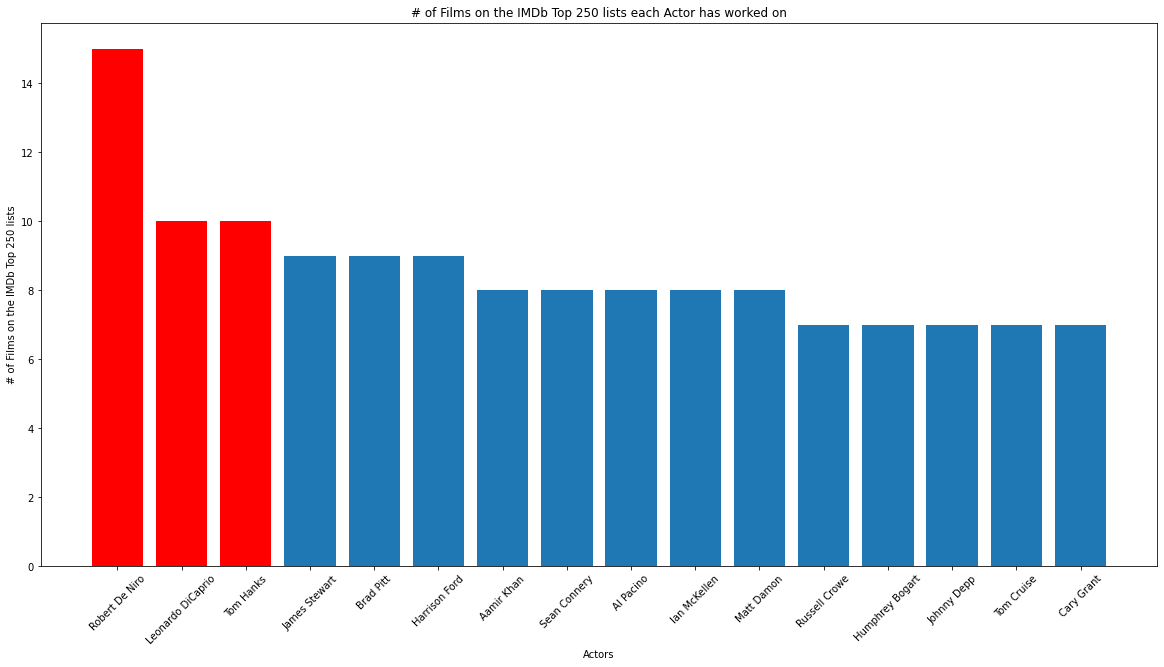

In [31]:
num = 6  # Min. number of movies to appear on the plot
cast_counts = all_cast.value_counts('Actors').reset_index().rename(columns = {0:'Count'})
count_val1 = cast_counts[ cast_counts['Count'] > num ]


# Print the 3 actors with the most movies from the top 250 list
print('These actors have worked on the most top 250 movies:\n')
for i, actor in enumerate(cast_counts['Actors'].head(3)):
    print('{}: {} - {} movies'.format(i + 1, actor.lstrip(), cast_counts.loc[i, 'Count']))

# Print how many actors have worked on 1, 2, 3, and 5 movies
print('\n{} actors have participated in at least 1 movie'.format(len(cast_counts)))
for i in [2, 3, 5]:
    print('{} actors have participated in at least {} movies'.format(len(cast_counts[cast_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val1['Actors']), list(count_val1['Count']))
plt.bar(list(count_val1['Actors'].head(3)), list(count_val1['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 250 lists each Actor has worked on')
plt.xlabel('Actors')
plt.ylabel('# of Films on the IMDb Top 250 lists')

#fig.savefig('Actors_top250_films')

These actors have worked on the most top 250 movies:

1: Robert De Niro - 10 movies
2: Tom Hanks - 9 movies
3: James Stewart - 8 movies

476 actors have participated in at least 1 movie
121 actors have participated in at least 2 movies
58 actors have participated in at least 3 movies
19 actors have participated in at least 5 movies


Text(0, 0.5, '# of Films on the IMDb Top 250 lists')

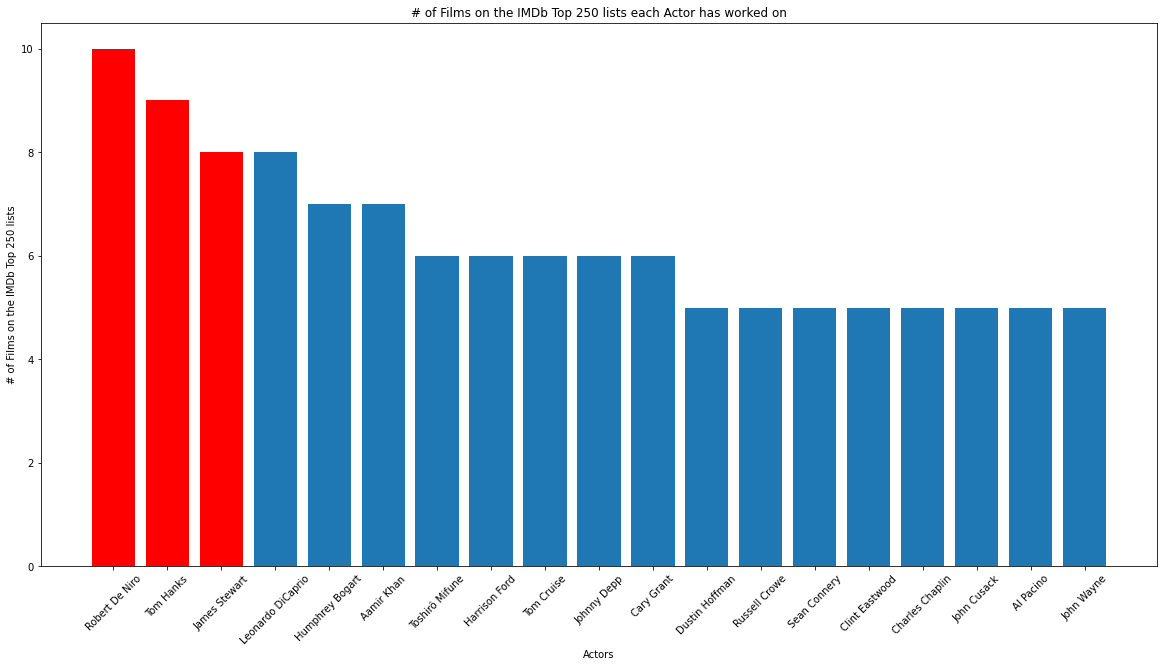

In [32]:
# Specifically only Cast1 data
num = 4  # Min. number of movies to appear on the plot
cast_counts = all_cast[all_cast['Cast'] == 'Cast1'].value_counts('Actors').reset_index().rename(columns = {0:'Count'})
count_val2 = cast_counts[ cast_counts['Count'] > num ]


# Print the 3 actors with the most movies from the top 250 list
print('These actors have worked on the most top 250 movies:\n')
for i, actor in enumerate(cast_counts['Actors'].head(3)):
    print('{}: {} - {} movies'.format(i + 1, actor.lstrip(), cast_counts.loc[i, 'Count']))

# Print how many actors have worked on 1, 2, 3, and 5 movies
print('\n{} actors have participated in at least 1 movie'.format(len(cast_counts)))
for i in [2, 3, 5]:
    print('{} actors have participated in at least {} movies'.format(len(cast_counts[cast_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val2['Actors']), list(count_val2['Count']))
plt.bar(list(count_val2['Actors'].head(3)), list(count_val2['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 250 lists each Actor has worked on')
plt.xlabel('Actors')
plt.ylabel('# of Films on the IMDb Top 250 lists')

#fig.savefig('Actors_top250_films')

These actors have worked on the most top 50 movies:

1: Tom Hanks - 7 movies
2: Robert De Niro - 6 movies
3: Harrison Ford - 5 movies


476 actors have participated in at least 1 movie

63 actors have participated in at least 2 movies

26 actors have participated in at least 3 movies



Text(0, 0.5, '# of Films on the IMDb Top 50 lists')

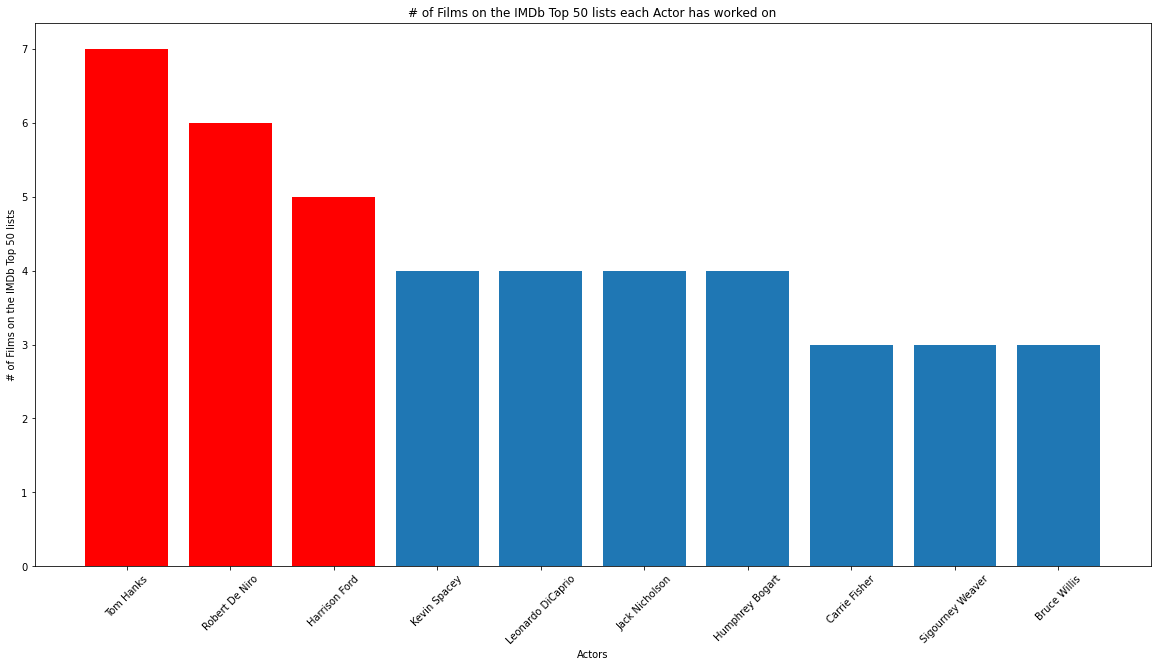

In [33]:
num = 0  #Cut off for the plot

all_cast_top50 = all_cast[all_cast['Ranking'] <= 50]
cast_counts = pd.DataFrame(all_cast_top50['Actors'].value_counts().items()).rename(columns = {0:'Actors', 1:'Count'})

count_val3 = cast_counts[ cast_counts['Count'] > num ]

print('These actors have worked on the most top 50 movies:\n')

for i, actor in enumerate(cast_counts['Actors'].head(3)):
    print('{}: {} - {} movies'.format(i + 1, actor.lstrip(), cast_counts.loc[i, 'Count']))

print('\n\n{} actors have participated in at least 1 movie\n'.format(len(cast_counts)))

for i in [2, 3]:
    print('{} actors have participated in at least {} movies\n'.format(len(cast_counts[cast_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val3['Actors'].head(10)), list(count_val3['Count'].head(10)))
plt.bar(list(count_val3['Actors'].head(3)), list(count_val3['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 50 lists each Actor has worked on')
plt.xlabel('Actors')
plt.ylabel('# of Films on the IMDb Top 50 lists')

#fig.savefig('Actors_top10_films')

These actors have worked on the most top 50 movies:

1: Tom Hanks - 7 movies
2: Robert De Niro - 6 movies
3: Harrison Ford - 5 movies


476 actors have participated in at least 1 movie

63 actors have participated in at least 2 movies

26 actors have participated in at least 3 movies



,Ranking,Title,Cast,Actors
18,19,Toy Story,Cast1,Tom Hanks
34,35,That Thing You Do!,Cast1,Tom Hanks
175,12,Forrest Gump,Cast1,Tom Hanks
319,5,Saving Private Ryan,Cast1,Tom Hanks
356,15,Toy Story 2,Cast1,Tom Hanks
360,28,The Green Mile,Cast1,Tom Hanks
603,26,Toy Story 3,Cast1,Tom Hanks


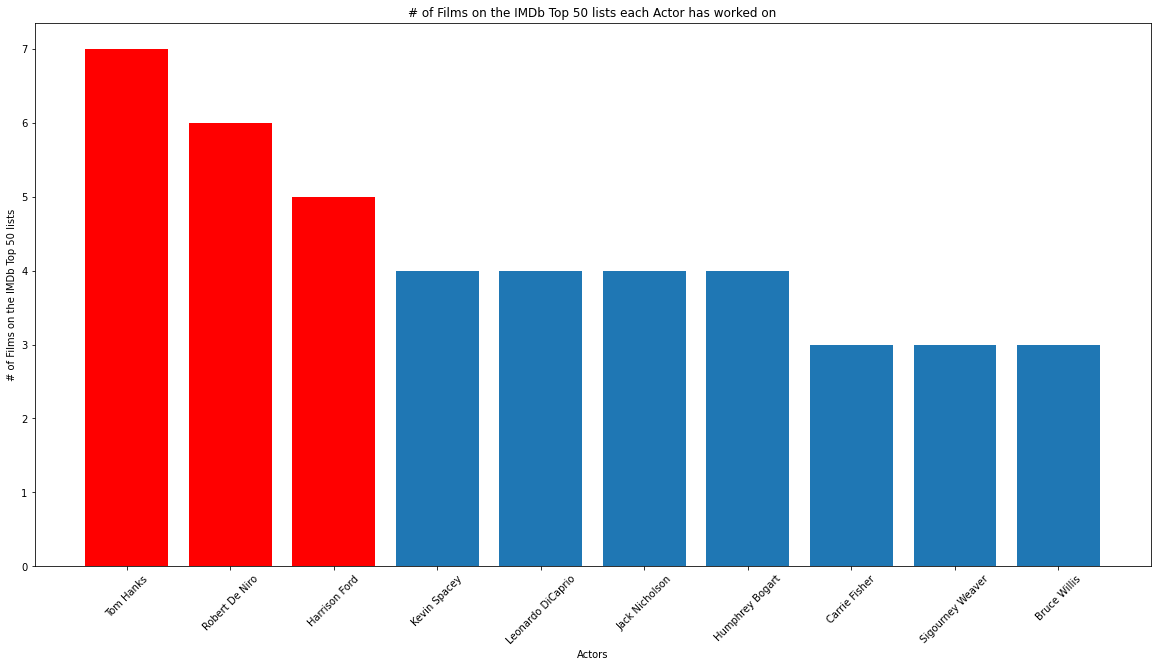

In [34]:
### Repeat, except limit the data to only the top 50s for each year and Cast1 only

num = 0  #Cut off for the plot

all_cast_top50_cast1 = all_cast[(all_cast['Ranking'] <= 50) & (all_cast['Cast'] == 'Cast1')]
cast_counts = pd.DataFrame(all_cast_top50['Actors'].value_counts().items()).rename(columns = {0:'Actors', 1:'Count'})

count_val4 = cast_counts[ cast_counts['Count'] > num ]

print('These actors have worked on the most top 50 movies:\n')

for i, actor in enumerate(cast_counts['Actors'].head(3)):
    print('{}: {} - {} movies'.format(i + 1, actor.lstrip(), cast_counts.loc[i, 'Count']))

print('\n\n{} actors have participated in at least 1 movie\n'.format(len(cast_counts)))

for i in [2, 3]:
    print('{} actors have participated in at least {} movies\n'.format(len(cast_counts[cast_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val4['Actors'].head(10)), list(count_val4['Count'].head(10)))
plt.bar(list(count_val4['Actors'].head(3)), list(count_val4['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 50 lists each Actor has worked on')
plt.xlabel('Actors')
plt.ylabel('# of Films on the IMDb Top 50 lists')

#fig.savefig('Actors_top10_films')

all_cast_top50_cast1[all_cast_top50_cast1['Actors'] == 'Tom Hanks']

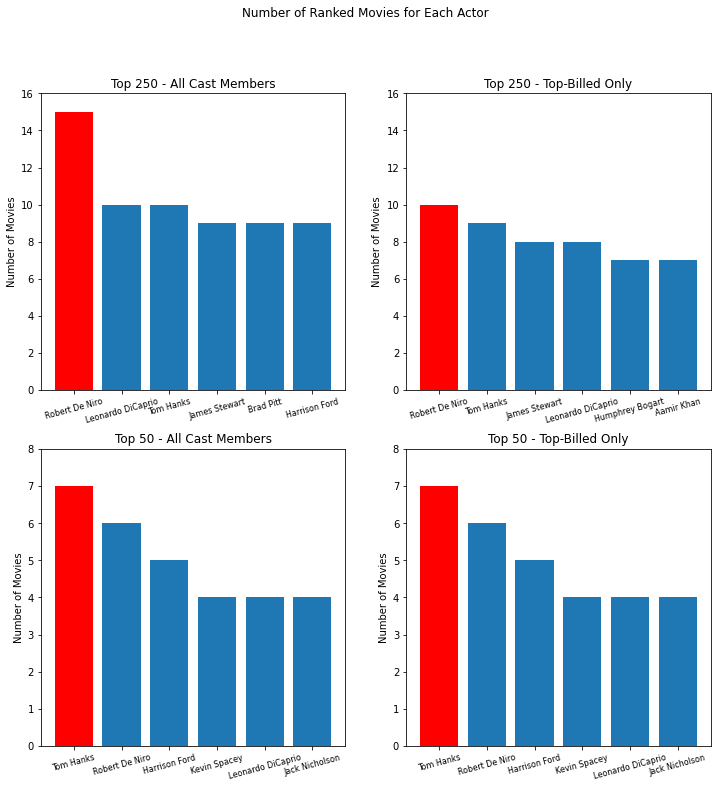

In [35]:
# Combining charts into one plot

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_figwidth(12)
fig.set_figheight(12)
plt.suptitle('Number of Ranked Movies for Each Actor')
ax1.set_title('Top 250 - All Cast Members')
ax2.set_title('Top 250 - Top-Billed Only')
ax3.set_title('Top 50 - All Cast Members')
ax4.set_title('Top 50 - Top-Billed Only')
ax1.set_ylabel('Number of Movies')
ax2.set_ylabel('Number of Movies')
ax3.set_ylabel('Number of Movies')
ax4.set_ylabel('Number of Movies')
ax1.set_ylim([0,16])
ax2.set_ylim([0,16])
ax3.set_ylim([0,8])
ax4.set_ylim([0,8])

cv1 = count_val1.head(6)
cv2 = count_val2.head(6)
cv3 = count_val3.head(6)
cv4 = count_val4.head(6)

cv_list = [cv1, cv2, cv3, cv4]
ax_list = [ax1, ax2, ax3, ax4]

for cv,ax in zip(cv_list, ax_list):
    ax.bar(cv['Actors'].head(1), cv['Count'].head(1), color = 'r')
    ax.bar(cv['Actors'].tail(5), cv['Count'].tail(5))
    ax.tick_params('x', labelrotation = 15, labelsize = '8')



<a id='directors'></a>

## Directors

In [137]:
# Initialize data frame 


# Removing white spaces
people_df['Director'] = people_df['Director'].str.strip()

dir_df = people_df[['Ranking','Title','Director']].copy().rename(columns={'value':'Directors'})

dir_df.head()

,Ranking,Title,Director
0,1,Star Wars,George Lucas
250,1,The Shawshank Redemption,Frank Darabont
2,3,Trainspotting,Danny Boyle
3,4,The Usual Suspects,Bryan Singer
4,5,The Wrong Trousers,Nick Park


In [138]:
# Get count of directors across all movies
dir_counts = pd.DataFrame(dir_df.value_counts('Director').items()).rename(columns = {0:'Director', 1:'Count'})

dir_counts.head()

,Director,Count
0,Alfred Hitchcock,13
1,Stanley Kubrick,10
2,Steven Spielberg,10
3,Billy Wilder,9
4,Martin Scorsese,9


These directors have worked on at least 10 movies that made the IMDb Top 250 lists:

1: Alfred Hitchcock - 13 movies
2: Stanley Kubrick - 10 movies
3: Steven Spielberg - 10 movies


427 directors have participated in at least 1 movie

132 directors have participated in at least 2 movies

69 directors have participated in at least 3 movies



,Director,Count
0,Alfred Hitchcock,13
1,Stanley Kubrick,10
2,Steven Spielberg,10
3,Billy Wilder,9
4,Martin Scorsese,9
5,Christopher Nolan,8
6,Akira Kurosawa,8
7,Peter Jackson,8
8,Hayao Miyazaki,6
9,David Fincher,6


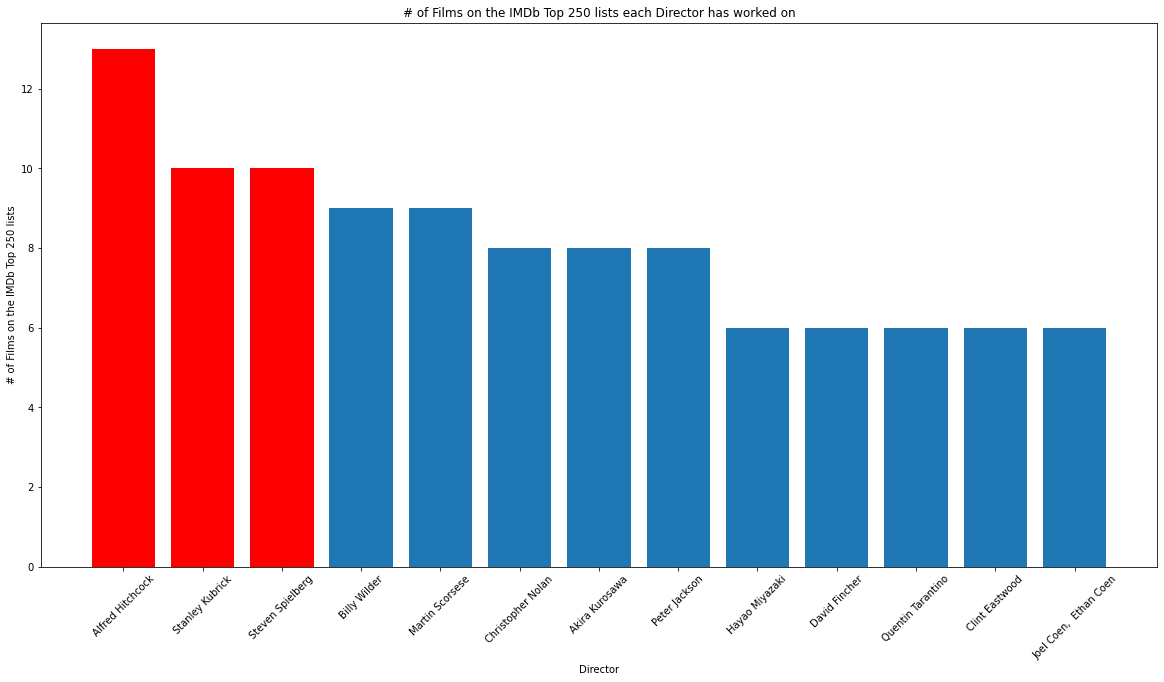

In [139]:
num = 5  #Cut off # of movies for the plot
count_val_d1 = dir_counts[ dir_counts['Count'] > num ]

print('These directors have worked on at least 10 movies that made the IMDb Top 250 lists:\n')

for i, director in enumerate(dir_counts[ dir_counts['Count'] >= 10 ].Director):
    print('{}: {} - {} movies'.format(i + 1, director, dir_counts.loc[i, 'Count']))

print('\n\n{} directors have participated in at least 1 movie\n'.format(len(dir_counts)))

for i in [2, 3]:
    print('{} directors have participated in at least {} movies\n'.format(len(dir_counts[dir_counts['Count'] >= i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val_d1['Director']), list(count_val_d1['Count']))
plt.bar(list(count_val_d1['Director'].head(3)), list(count_val_d1['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 250 lists each Director has worked on')
plt.xlabel('Director')
plt.ylabel('# of Films on the IMDb Top 250 lists')

plt.show

count_val_d1

#fig.savefig('Directors_top250_films')

In [140]:
# Same analysis but for the top 50 movies
dir50_counts = pd.DataFrame(dir_df[dir_df['Ranking'] <= 50]['Director'].value_counts().items())\
                    .rename(columns = {0:'Director', 1:'Count'})

dir50_counts.head()

,Director,Count
0,Christopher Nolan,6
1,Stanley Kubrick,5
2,James Cameron,4
3,Alfred Hitchcock,4
4,Martin Scorsese,4


These directors have worked on the most top 50 movies:

1: Christopher Nolan - 6 movies
2: Stanley Kubrick - 5 movies
3: James Cameron - 4 movies
4: Alfred Hitchcock - 4 movies
5: Martin Scorsese - 4 movies


101 directors have participated in at least 1 movie

24 directors have participated in at least 2 movies

12 directors have participated in at least 3 movies



,Director,Count
0,Christopher Nolan,6
1,Stanley Kubrick,5
2,James Cameron,4
3,Alfred Hitchcock,4
4,Martin Scorsese,4
5,Billy Wilder,3
6,John Huston,3
7,Francis Ford Coppola,3
8,Peter Jackson,3
9,Steven Spielberg,3


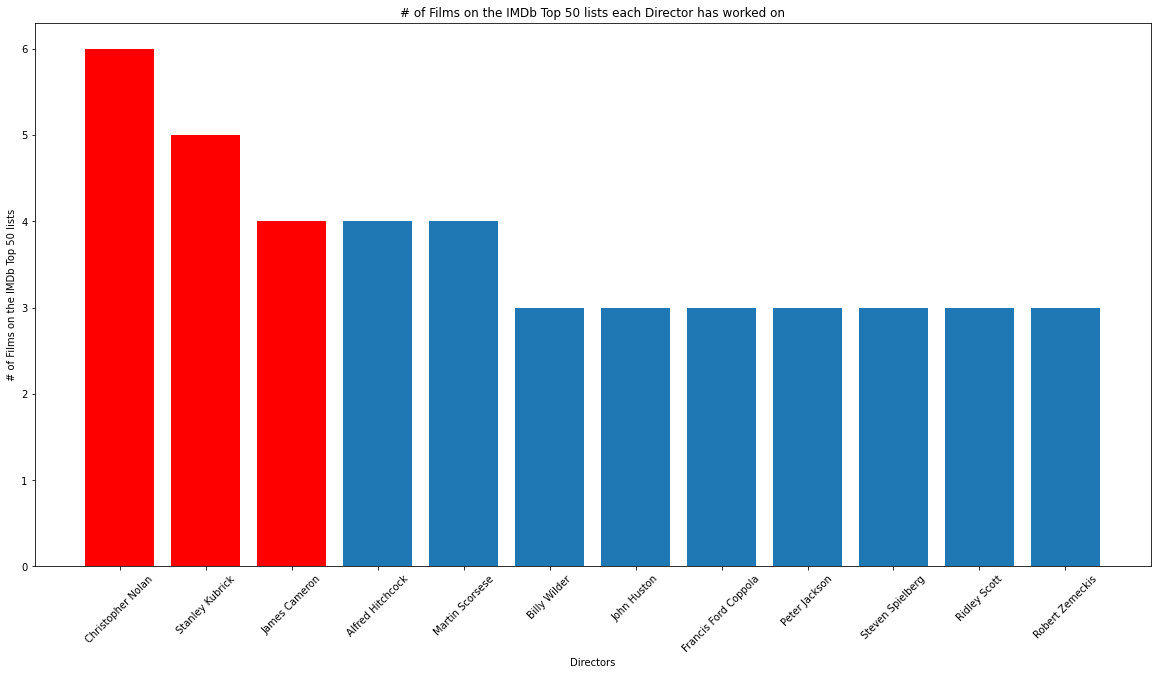

In [141]:
num = 2  #Cut off for the plot
count_val_d2 = dir50_counts[ dir50_counts['Count'] > num ]

print('These directors have worked on the most top 50 movies:\n')

for i, director in enumerate(dir50_counts['Director'].head(5)):
    print('{}: {} - {} movies'.format(i + 1, director, dir50_counts.loc[i, 'Count']))

print('\n\n{} directors have participated in at least 1 movie\n'.format(len(dir50_counts)))

for i in [2, 3]:
    print('{} directors have participated in at least {} movies\n'.format(len(dir50_counts[dir50_counts['Count']>=i]), i))

fig = plt.figure(figsize = (20, 10))
plt.bar(list(count_val_d2['Director']), list(count_val_d2['Count']))
plt.bar(list(count_val_d2['Director'].head(3)), list(count_val_d2['Count'].head(3)), color = 'r')
plt.xticks(rotation = 45)
plt.title('# of Films on the IMDb Top 50 lists each Director has worked on')
plt.xlabel('Directors')
plt.ylabel('# of Films on the IMDb Top 50 lists')

plt.show

count_val_d2

#fig.savefig('Directors_top_10')

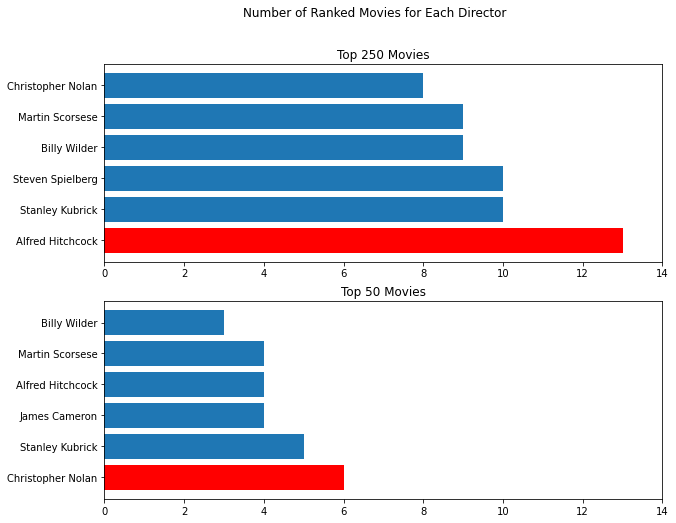

In [41]:
# Combining the charts

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figwidth(10)
fig.set_figheight(8)
plt.suptitle('Number of Ranked Movies for Each Director')
ax1.set_title('Top 250 Movies')
ax2.set_title('Top 50 Movies')
ax1.set_xlim([0, 14])
ax2.set_xlim([0, 14])
#ax1.set_xlabel('Number of Movies')
#ax2.set_xlabel('Number of Movies')

cv1 = count_val_d1.head(6)
cv2 = count_val_d2.head(6)

cv_list = [cv1, cv2]
ax_list = [ax1, ax2]

for cv,ax in zip(cv_list, ax_list):
    ax.barh(cv['Director'].head(1), cv['Count'].head(1), color = 'r')
    ax.barh(cv['Director'].tail(5), cv['Count'].tail(5))

<a id='ML'></a>

# Machine Learning

The second part of this analysis is to build machine learning models to see if the dataset is sufficient enough to predict the rankings of any given movie on the IMDb top 250 lists. For this analysis, I decided to use decision trees, random forests, and SVMs. I would compare the accuracy, precision, recall, F1 scores, and execution times to determine which model performed the best, assuming that I can get a working model at all.

In [42]:
!pip install graphviz
import graphviz

import category_encoders as ce

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#To time how fast the model performs the job
import time

print('\n# of unique values in each column\n{}\n'.format(imdb_df.nunique()))
print('# of N/A values in each column\n{}\n'.format(imdb_df.isna().sum()))


# of unique values in each column
Ranking     250
IMDByear     25
IMDBlink    733
Title       732
Date        100
RunTime     140
Genre       197
Rating       31
Score        40
Votes       733
Gross       583
Director    428
Cast1       477
Cast2       623
Cast3       656
Cast4       690
dtype: int64

# of N/A values in each column
Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       851
Votes         0
Gross       785
Director      0
Cast1         0
Cast2         0
Cast3         8
Cast4         8
dtype: int64



As we can see above, the Score and Gross columns each have hundreds of N/A values. Considering the subjectivity of what makes a movie popular as well as the high variance in either column, it wouldn't be suitable to try to fill in this values (like with the mean for other movies of the same ranking). Both features are possibly important for the model as well, so instead of dropping the features themselves, I will just drop any instances with N/A values in either column. Cast3 and Cast4 also has 8 N/A values each, and dropping those instances will have much less of an effect.

I will scale the Ratings and Score models to be decimals between -1 and 1 to make their influence more equal as both are scoring systems, just on different scale sizes.

I will scale the Votes and Gross columns as the range for both features is huge. To keep the process simply, I will just do a simple scaling where I subtract the mean from each value and divide by the range. This should scale each column to only contain values between -1 and 1

I will drop the Title and Link columns as both act as id columns and will not be useful. I will also drop the IMDByear column which similarly acts as an ID column.

I created an Age column to replace the IMDByear column which describes how old the movie is for a given ranking

Finally, sklearn requires categorical data to be converted to numeric. I will use one hot encoder to encode the Director and Cast1 columns.

For the Genre columns specifically, I will create a column for each genre and mark any movies with that associated genre with 1, and a 0 otherwise. This would be better done separately as some movies have up to 3 genres which the encoder would likely treat as a unique genre rather than a combination of 3 existing genres.

Cast1 mainly contains the lead actor/actress while the other cast columns tend to be supporting roles. Each column has hundreds of values that would inundate the model, so it would be better to simply cut those columns entirely.

To also aid in reducing the amount of features, I will take the top 50 values Director, and Cast1 columns and drop other values. For the Genre column, I will only take the top 20 as there are only 23 total as calculated earlier.

For all columns with nominal string values, I will run lstrip() and rstrip() to delete any white spaces that would differentiate otherwise identical strings (ex: in the previous Director analysis, before running lstrip()/rstrip(), Steven Spielberg appeared to only have 10 movies, but he actually had 16)


Regarding the classes, I suspect having 250 possible classes will make the model very inaccurate. To handle this, I will create one class vector y with the original values, then one called y_binned that will contain bins of equal size. I will use 5 bins which contain 50 classes each. This number is chosen arbitrarily

In [43]:
### Functions that will be used in the pre-processing

def feature_scale(feature_arr):
    # Scales an inputted feature array by subtracting the mean and dividing by the range
    feature_range = max(feature_arr) - min(feature_arr)
    feature_mean = np.mean(feature_arr)

    output = feature_arr.copy()

    for i,feature in enumerate(feature_arr):
        output[i] = (feature - feature_mean) / feature_range

    return output

def cut_values(feature_df, cut_num = 0):
    #feature_df is the columns of the encoded feature; cut_num is the desired number of columns
    #output is a list of values to drop, or empty list if cut_num is 0 or not supplied
    
    if cut_num > 0:
        colnum = len(feature_df.columns)
        return list(feature_df.apply(sum).nsmallest(colnum - cut_num).index)
    else:
        if cut_num < 0:
            print('Error: Invalid cut number, returning an empty list')
        return list()


def white_strip(column_list):
    # remove any white spaces in the string values from a list; outputs a new 
    for i, value in enumerate(column_list):
        tempval = value.lstrip()
        tempval = value.rstrip()

        column_list[i] = tempval
        
    return column_list

In [142]:
# View the original data frame
imdb_df.head()

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1254781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2407245,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,645186,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Mystery, Thriller",8.5,77.0,1010775,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,51747,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


## Pre-processing the data

In [185]:
### PRE-PROCESSING THE DATA
imdb_dat = imdb_df.copy()

### sklearn requires encoding categorical variables to numbers

### Replace N/A values with -1
imdb_dat = imdb_dat.fillna(-1)

### Add a column showing difference in date from Date to IMDByear
imdb_dat['Age'] = imdb_dat['IMDByear'] - imdb_dat['Date']

########## Title/Link/Year and NA rows dropped
imdb_dat = imdb_dat.drop(['IMDBlink', 'Title', 'IMDByear'], axis=1)#.dropna()

########## Scale the Ratings, Score, Votes, and Gross columns [fillna for score and gross due to N/A values]
for col in ['Rating', 'Score', 'Votes', 'Gross']:
    imdb_dat[col] = imdb_dat[col]
    imdb_dat[col] = feature_scale(list(imdb_dat[col]))

#### Genre one hot encoder
# MultiLabelBinarizer since Genre can contain lists
genre_dict = split_store_unique(imdb_dat, 'Genre', ', ')
genre_list = genre_dict.reset_index().rename(columns = {'index':'Genre_ind'})

mlb_genre = preprocessing.MultiLabelBinarizer()
imdb_dat = imdb_dat.join(pd.DataFrame(mlb_genre.fit_transform(imdb_dat.Genre.str.split(', ')),\
                             columns = genre_list['Genre'], index = imdb_dat.index)).drop(columns = 'Genre')

### Director and Cast one hot encoder
# Binary Encoder to reduce dimensionality
cols = ['Director', 'Cast1', 'Cast2', 'Cast3', 'Cast4']

for col_val in cols:
    imdb_dat.loc[:, col_val] = imdb_dat[col_val].str.rstrip().str.lstrip()
    encoder = ce.BinaryEncoder(cols = col_val, return_df = True)
    imdb_dat = encoder.fit_transform(imdb_dat)


imdb_dat.head()

,Ranking,Date,RunTime,Rating,Score,Votes,Gross,Director_0,Director_1,Director_2,...,Animation,Family,Film-Noir,Western,Horror,Sport,Music,Musical,Short,Documentary
0,1,1977,121,0.113756,0.171393,0.330743,0.278881,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1994,142,0.297966,0.072383,0.811269,-0.035092,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1996,93,-0.017823,0.102086,0.076569,-0.047719,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1995,106,0.087440,0.042680,0.229004,-0.040424,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,1993,30,0.034808,-0.729597,-0.170868,-0.066383,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Initializing the models and binning the classes

In [144]:
### Build the data set inputs for the ML models and assign the models
imdb_dat_cut = imdb_dat.copy().drop(columns = ['Date', 'RunTime'])
seed = 15
binnum = 5
bintop10 = [1, 10, 50, 100, 250]
#bintop10 = [1, 10, 25, 50, 100, 250]
#bintop10 = [1, 10, 50, 250]

#Extract the class column
y = imdb_dat_cut.Ranking
#Extract the data columns
X = imdb_dat_cut.drop('Ranking', axis=1)

#Create the train/test data split, 70% split, random state creates a seed for reproducibility
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = seed)
############################Version with class bins
y_binned = pd.cut(y, bins = binnum, right=True, include_lowest=True, labels = range(1,binnum + 1))
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X, y_binned, test_size=0.3, random_state = seed)
############################Version with top 10, 10-50, 50-100, 100-250 bin ranges
y_binnedtop10 = pd.cut(y, bins = bintop10, right=True, include_lowest=True, labels = range(1,len(bintop10)))
Xbintop10_train, Xbintop10_test, ybintop10_train, ybintop10_test = train_test_split(X, y_binnedtop10, test_size=0.3, random_state = seed)

# Initialize models
d_tree = tree.DecisionTreeClassifier(random_state = seed)
rf = RandomForestClassifier(random_state = seed)
svm = SVC(kernel='rbf', gamma=.0075, C=1000, random_state=seed)

## Defining useful functions to compare model results

In [170]:
# Prints useful ML stats given the test instance classes and the predicted instance classes
def ml_stats(y_test, y_pred):
    print('Confusion Matrix:\n')
    
    conmat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    classreport = classification_report(y_test, y_pred)
    
    print(conmat, '\n\n')
    print('Accuracy Score:\n{}\n\n'.format(acc))
    print('Classification Report Score:\n{}\n\n'.format(classreport))
    
    
# Similar to ml_stats, but gives the returns all outputs instead of printing them
def ml_stats_outputs(y_test, y_pred):
    conmat = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    classreport = classification_report(y_test, y_pred, output_dict = True)
    
    return conmat, acc, classreport
    

############ EDIT FUNCTIONS TO PRODUCE CONMAT FOR ML_COMPARISON, STREAMLINE FUNCTIONS
    
    
# Prints out stats comparing accuracy, precision, recall, f1, and gives model with best stats in each               
def ml_comparison(y_list, models, time_list = -1):
    #y_list is a list of lists; each sublist consists of test y values and predicted y values
    #models is a list of the models used (as strings, ex: 'Decision Tree')
    ######ml_stats_outputs is redefined here as an inner function in case I want to use this again in the future :)
    if len(y_list) != len(models):
        print('Error: {} pairs of y_test/y_pred values, but only {} models given'.format(len(y_list), len(models)))
        
    else: 
        ml_stats_list = list()
        
        #Get the ML stat outputs for all models
        for i in range(0, len(models)):
            [conmat, accuracy, classification] = ml_stats_outputs(y_list[i][0], y_list[i][1])
            print(models[i])
            print(conmat)
            print('\n')
            
            ml_stats_list.append([accuracy, classification])
            
      
        #Extract and print accuracy values; Extract precision, recall, f1 average scores from classification dictionaries
        #Also track the best models in each category
        compare_type = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
        best_models_index = [0, 0, 0, 0]
        best_model_counter = [0, 0, 0, 0]
        
        for i, compare in enumerate(compare_type):
            print('{} Comparison\n'.format(compare))
            
            best = 0
            
            for j,model in enumerate(models):
                if compare == 'Accuracy':
                    model_acc = ml_stats_list[j][0] * 100
                    print('{}: {:.5F}%'.format(model, model_acc))
                    
                    # Record the first accuracy; if any subsequent accuracies are higher, 
                    if model_acc > best:
                        best_models_index[i] = j
                        best = model_acc
                            
                    
                else:
                    ml_stats_dict = ml_stats_list[j][1]
                    prec_rec_f1_support = list(ml_stats_dict['weighted avg'].values())
                    
                    print('{}: {:.5F}'.format(model, prec_rec_f1_support[i-1]))
                    
                    if prec_rec_f1_support[i-1] > best:
                        best_models_index[i] = j
                        best = prec_rec_f1_support[i-1]
            print('\n')
            
            #Record which model did the best in the comparison type
            best_model_counter[best_models_index[i]] = best_model_counter[best_models_index[i]] + 1
            
        #### MAKE A COMPARISON FOR EXECUTION TIMES HERE
        #Default time
        #best_model_time = 0
        
        if time_list != -1:
            if len(time_list) != len(models):
                print('{} models but {} time values submitted to the function\n'.format(len(models), len(time_list)))
                      
            else:
                compare_type.append('Execution Time')
                
                #Default  to the first time/model/index, these will be updated if better ones are found
                best_model_TIME = time_list[0]
                best_i_TIME = 0
                
                print('Execution Time Comparison\n')
                
                for i, timelist_models in enumerate(zip(time_list, models)):
                    timeval, time_model = timelist_models
                    
                    print('{}: {:.5F}s'.format(time_model, timeval))
                    
                    if best_model_TIME > timeval:
                        best_model_TIME = timeval
                        best_i_TIME = i
                        
                print('\n')
                
                
                best_models_index.append(best_i_TIME)
                best_model_counter[best_i_TIME] = best_model_counter[best_i_TIME] + 1
        
        #Conclusions
        print('Best model for each category\n')
        for compare, model_num in zip(compare_type, best_models_index):
            print('{}: {}'.format(compare, models[model_num]))
        
        if time_list == -1:
            print('No time values were submitted')
        best_model = best_model_counter.index(max(best_model_counter))
        print('\nBest model overall: {}'.format(models[best_model]))
        
def timed_ml_fit(clf, X, X_train, y_train):
    start = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X)
    end = time.time()
    
    runtime = end - start
    print(f'Model: {clf}\nExecution Time: {runtime} s\n\n')
    
    return y_pred, runtime
    


## Attempting to run a decision tree with 250 classes

In [105]:
############################################ DECISION TREE CODE
clf = d_tree
data = [X_test, y_test, X_train, y_train]

[y_pred, tree_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

tree_y_pred = y_pred.copy()

Model: DecisionTreeClassifier(random_state=15)
Execution Time: 0.11569046974182129 s


Confusion Matrix:

[[7 3 0 ... 0 0 0]
 [0 3 4 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]] 


Accuracy Score:
0.06933333333333333


Classification Report Score:
              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.43      0.38      0.40         8
           3       0.44      0.57      0.50         7
           4       0.00      0.00      0.00         3
           5       0.60      0.60      0.60         5
           6       0.29      0.25      0.27         8
           7       0.22      0.25      0.24         8
           8       0.50      0.43      0.46         7
           9       0.50      0.44      0.47         9
          10       0.50      0.14      0.22         7
          11       0.22      0.22      0.22         9
          12       0.29      0.50      0.36         4
 

Overall accuracy was very low at just 6.33%, but looking at the classification report, after about 20th place, many of the rankings simply went unfilled (especially the worst rankings). This means there were too many classes to consider.

To help the model but also preserve some sense of the data, I will bin the classes into 10 bins (out of 250 classes, this means 25 classes per bin). These values were calculated earlier.

<a id='5'></a>

## 5 equal-width bins (1-50, 51-100, 101-150, 151-200, 201-250)

In [162]:
################################### DECISION TREE
clf = d_tree
data = [Xbin_test, ybin_test, Xbin_train, ybin_train]

[y_pred, treebin_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

tree_ybin_pred = y_pred.copy()

Model: DecisionTreeClassifier(random_state=15)
Execution Time: 0.2323780059814453 s


Confusion Matrix:

[[342  34   5   3   3]
 [ 40 278  47  12   1]
 [  4  72 239  47   9]
 [  2   5  63 218  64]
 [  1   9  27  97 253]] 


Accuracy Score:
0.7093333333333334


Classification Report Score:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88       387
           2       0.70      0.74      0.72       378
           3       0.63      0.64      0.64       371
           4       0.58      0.62      0.60       352
           5       0.77      0.65      0.71       387

    accuracy                           0.71      1875
   macro avg       0.71      0.71      0.71      1875
weighted avg       0.71      0.71      0.71      1875





In [107]:
# View the tree

#fig = plt.figure(figsize = (175,125))

#output = tree.plot_tree(decision_tree_bins, feature_names=X.columns, class_names=str(y_binned.unique()), filled=True)

#fig.savefig('decision_tree_binned.png')

In [163]:
######################################### RANDOM FORESTS CODE
clf = rf
data = [Xbin_test, ybin_test, Xbin_train, ybin_train]

[y_pred, rfbin_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

rf_ybin_pred = y_pred.copy()

Model: RandomForestClassifier(random_state=15)
Execution Time: 0.6435644626617432 s


Confusion Matrix:

[[342  34   5   2   4]
 [ 37 285  42  13   1]
 [  3  60 259  39  10]
 [  1   6  66 219  60]
 [  1   2  13  89 282]] 


Accuracy Score:
0.7397333333333334


Classification Report Score:
              precision    recall  f1-score   support

           1       0.89      0.88      0.89       387
           2       0.74      0.75      0.75       378
           3       0.67      0.70      0.69       371
           4       0.60      0.62      0.61       352
           5       0.79      0.73      0.76       387

    accuracy                           0.74      1875
   macro avg       0.74      0.74      0.74      1875
weighted avg       0.74      0.74      0.74      1875





In [109]:
######################################### SVM CODE
clf = svm
data = [Xbin_test, ybin_test, Xbin_train, ybin_train]

[y_pred, svmbin_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

svm_ybin_pred = y_pred.copy()

Model: SVC(C=1000, gamma=0.0075, random_state=15)
Execution Time: 2.721726179122925 s


Confusion Matrix:

[[337  45   5   0   0]
 [ 28 296  41  11   2]
 [  6  54 260  43   8]
 [  3   5  59 228  57]
 [ 10  15  19  82 261]] 


Accuracy Score:
0.7370666666666666


Classification Report Score:
              precision    recall  f1-score   support

           1       0.88      0.87      0.87       387
           2       0.71      0.78      0.75       378
           3       0.68      0.70      0.69       371
           4       0.63      0.65      0.64       352
           5       0.80      0.67      0.73       387

    accuracy                           0.74      1875
   macro avg       0.74      0.74      0.74      1875
weighted avg       0.74      0.74      0.74      1875





In [187]:
# VARIABLES
# ybin_test, tree_ybin_pred
# ybin_test, rf_ybin_pred
# ybin_test, svm_ybin_pred

clf_list = [d_tree, d_tree, rf, svm]
data = [[X_test, y_test, X_train, y_train], 
        [Xbin_test, ybin_test, Xbin_train, ybin_train],
        [Xbintop10_test, ybintop10_test, Xbintop10_train, ybintop10_train]]

#[y0, t0] = timed_ml_fit(clf_list[0], data[0][0], data[0][2], data[0][3])
[y1, t1] = timed_ml_fit(clf_list[1], data[1][0], data[1][2], data[1][3])
[y2, t2] = timed_ml_fit(clf_list[2], data[1][0], data[1][2], data[1][3])
[y3, t3] = timed_ml_fit(clf_list[3], data[1][0], data[1][2], data[1][3])

#y_pred_list = [y0, y1, y2, y3]
#exec_time_list = [t0, t1, t2, t3]
y_pred_list = [y1, y2, y3]
exec_time_list = [t1, t2, t3]

# VARIABLES
#yvals0 = [data[0][1], y0]
yvals1 = [data[1][1], y1]
yvals2 = [data[1][1], y2]
yvals3 = [data[1][1], y3]

#y_array = [yvals0, yvals1, yvals2, yvals3]
#models = ['Decision Tree with 250 Classes', 'Decision Tree', 'Random Forest', 'SVM']
#time_list = [exec_time_list[0], exec_time_list[1], exec_time_list[2], exec_time_list[3]]
y_array = [yvals1, yvals2, yvals3]
models = ['Decision Tree', 'Random Forest', 'SVM']
time_list = [exec_time_list[0], exec_time_list[1], exec_time_list[2]]

ml_comparison(y_array, models, time_list)

Model: DecisionTreeClassifier(random_state=15)
Execution Time: 0.04487919807434082 s


Model: RandomForestClassifier(random_state=15)
Execution Time: 0.5625038146972656 s


Model: SVC(C=1000, gamma=0.0075, random_state=15)
Execution Time: 2.562169075012207 s


Decision Tree
[[342  34   5   3   3]
 [ 40 278  47  12   1]
 [  4  72 239  47   9]
 [  2   5  63 218  64]
 [  1   9  27  97 253]]


Random Forest
[[342  34   5   2   4]
 [ 37 285  42  13   1]
 [  3  60 259  39  10]
 [  1   6  66 219  60]
 [  1   2  13  89 282]]


SVM
[[337  45   5   0   0]
 [ 28 296  41  11   2]
 [  6  54 260  43   8]
 [  3   5  59 228  57]
 [ 10  15  19  82 261]]


Accuracy Comparison

Decision Tree: 70.93333%
Random Forest: 73.97333%
SVM: 73.70667%


Precision Comparison

Decision Tree: 0.71320
Random Forest: 0.74201
SVM: 0.74073


Recall Comparison

Decision Tree: 0.70933
Random Forest: 0.73973
SVM: 0.73707


F1 Score Comparison

Decision Tree: 0.71009
Random Forest: 0.74053
SVM: 0.73746


Execution Time Compa

With only 5 classes for the models to worry about, all three had greatly improved results. Overall, the random forest model was the best, outperforming all other algorithms on all categories except the execution time (which was to be expected as decision trees are relatively simple algorithms).

<a id='top10'></a>

## Top 10-50-100-250 predictions

In [173]:
#Predict top 10, top 11-50, 51-100, top 101-250
clf = d_tree
data = [Xbintop10_test, ybintop10_test, Xbintop10_train, ybintop10_train]

[y_pred, treetop10_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

tree_ybintop10_pred = y_pred.copy()

Model: DecisionTreeClassifier(random_state=15)
Execution Time: 0.03928112983703613 s


Confusion Matrix:

[[  61    9    1    1]
 [   3  264   35   13]
 [   1   41  272   64]
 [   1   16   81 1012]] 


Accuracy Score:
0.8581333333333333


Classification Report Score:
              precision    recall  f1-score   support

           1       0.92      0.85      0.88        72
           2       0.80      0.84      0.82       315
           3       0.70      0.72      0.71       378
           4       0.93      0.91      0.92      1110

    accuracy                           0.86      1875
   macro avg       0.84      0.83      0.83      1875
weighted avg       0.86      0.86      0.86      1875





In [174]:
# View the tree

#fig = plt.figure(figsize = (250,200))

#output = tree.plot_tree(decision_tree_top10, feature_names=X.columns, class_names=str(y_binnedtop10.unique()), filled=True)

#fig.savefig('decision_tree_binnedtop10.png')

In [175]:
######################################### RANDOM FORESTS CODE
clf = rf
data = [Xbintop10_test, ybintop10_test, Xbintop10_train, ybintop10_train]

[y_pred, rftop10_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

rf_ybintop10_pred = y_pred.copy()

Model: RandomForestClassifier(random_state=15)
Execution Time: 0.4921548366546631 s


Confusion Matrix:

[[  62    8    1    1]
 [   3  267   33   12]
 [   0   37  285   56]
 [   0    4   66 1040]] 


Accuracy Score:
0.8821333333333333


Classification Report Score:
              precision    recall  f1-score   support

           1       0.95      0.86      0.91        72
           2       0.84      0.85      0.85       315
           3       0.74      0.75      0.75       378
           4       0.94      0.94      0.94      1110

    accuracy                           0.88      1875
   macro avg       0.87      0.85      0.86      1875
weighted avg       0.88      0.88      0.88      1875





In [176]:
######################################### SVM CODE
clf = svm
data = [Xbintop10_test, ybintop10_test, Xbintop10_train, ybintop10_train]

[y_pred, svmtop10_exec_time] = timed_ml_fit(clf, data[0], data[2], data[3])
ml_stats(data[1], y_pred)

svm_ybintop10_pred = y_pred.copy()

Model: SVC(C=1000, gamma=0.0075, random_state=15)
Execution Time: 1.3448262214660645 s


Confusion Matrix:

[[  62   10    0    0]
 [   4  262   41    8]
 [   0   34  292   52]
 [   3   24   72 1011]] 


Accuracy Score:
0.8677333333333334


Classification Report Score:
              precision    recall  f1-score   support

           1       0.90      0.86      0.88        72
           2       0.79      0.83      0.81       315
           3       0.72      0.77      0.75       378
           4       0.94      0.91      0.93      1110

    accuracy                           0.87      1875
   macro avg       0.84      0.84      0.84      1875
weighted avg       0.87      0.87      0.87      1875





Comparison of stats:

In [177]:
# VARIABLES
# ybin_test, tree_ybin_pred
# ybin_test, rf_ybin_pred
# ybin_test, svm_ybin_pred

clf_list = [d_tree, rf, svm]
data = [[X_test, y_test, X_train, y_train], 
        [Xbin_test, ybin_test, Xbin_train, ybin_train],
        [Xbintop10_test, ybintop10_test, Xbintop10_train, ybintop10_train]]

[y0, t0] = timed_ml_fit(clf_list[0], data[2][0], data[2][2], data[2][3])
[y1, t1] = timed_ml_fit(clf_list[1], data[2][0], data[2][2], data[2][3])
[y2, t2] = timed_ml_fit(clf_list[2], data[2][0], data[2][2], data[2][3])

y_pred_list = [y0, y1, y2]
exec_time_list = [t0, t1, t2]

# VARIABLES
yvals0 = [data[2][1], y0]
yvals1 = [data[2][1], y1]
yvals2 = [data[2][1], y2]

y_array = [yvals0, yvals1, yvals2]
models = ['Decision Tree', 'Random Forest', 'SVM']
time_list = [exec_time_list[0], exec_time_list[1], exec_time_list[2]]

ml_comparison(y_array, models, time_list)

Model: DecisionTreeClassifier(random_state=15)
Execution Time: 0.033747196197509766 s


Model: RandomForestClassifier(random_state=15)
Execution Time: 0.4593782424926758 s


Model: SVC(C=1000, gamma=0.0075, random_state=15)
Execution Time: 1.3276467323303223 s


Decision Tree
[[  61    9    1    1]
 [   3  264   35   13]
 [   1   41  272   64]
 [   1   16   81 1012]]


Random Forest
[[  62    8    1    1]
 [   3  267   33   12]
 [   0   37  285   56]
 [   0    4   66 1040]]


SVM
[[  62   10    0    0]
 [   4  262   41    8]
 [   0   34  292   52]
 [   3   24   72 1011]]


Accuracy Comparison

Decision Tree: 85.81333%
Random Forest: 88.21333%
SVM: 86.77333%


Precision Comparison

Decision Tree: 0.86049
Random Forest: 0.88298
SVM: 0.87207


Recall Comparison

Decision Tree: 0.85813
Random Forest: 0.88213
SVM: 0.86773


F1 Score Comparison

Decision Tree: 0.85910
Random Forest: 0.88245
SVM: 0.86946


Execution Time Comparison

Decision Tree: 0.03375s
Random Forest: 0.45938s
SVM: 1.32765

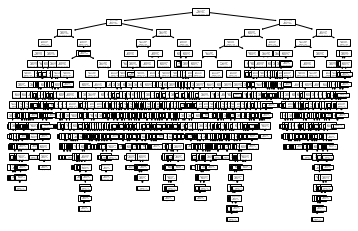

In [157]:
#tree.plot_tree(d_tree)
#plt.show()

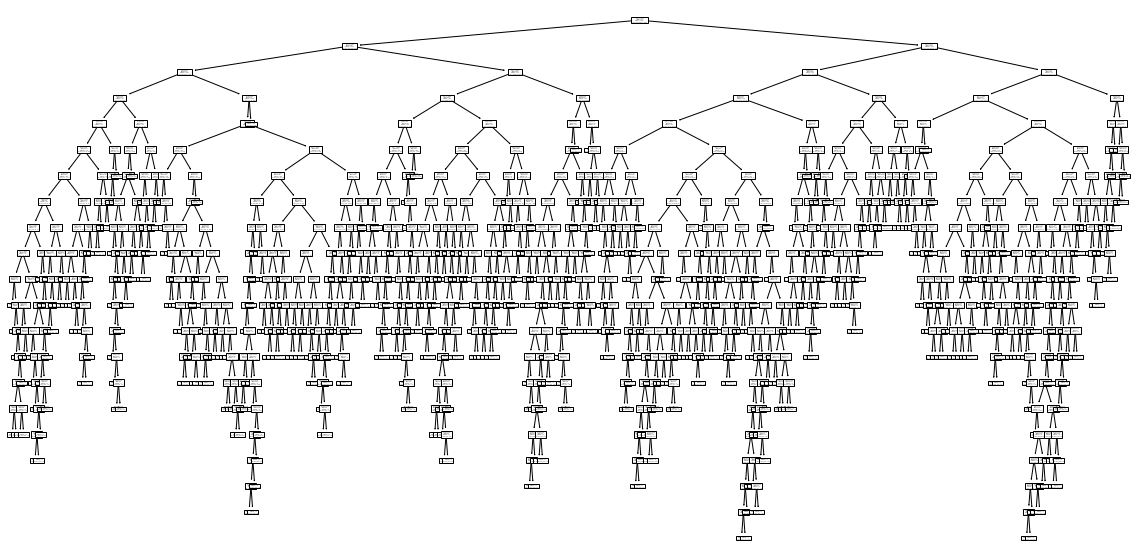

In [188]:
d_tree.fit(Xbintop10_train, ybintop10_train)
y_pred = clf.predict(X)

fig = plt.figure(figsize = (20, 10))

tree.plot_tree(d_tree)
plt.show()


In [184]:
#d_tree.fit(Xbin_train, ybin_train)
#print(tree.export_text(d_tree))

#y_pred = d_tree.predict(X)

#fig = plt.figure(figsize = (20, 20))

#tree.plot_tree(d_tree)
#plt.show()


DecisionTreeClassifier(random_state=15)

In [ ]:
# d_tree.fit(Xbintop10_train, ybintop10_train)
# #y_pred = d_tree.predict(X)

# fig = plt.figure(figsize = (20, 10))

# tree.plot_tree(d_tree)
# plt.show()


<a id='unused'></a>
# Unused code

In [ ]:
# # Compare the best rank for both the top 100 and bottom 100 grossing movies
# # IMPORTANT: Get the "lowest" rank for each movie (some movies made the top 250 several times at different rankings)
# ### Remember: Lower ranking is BETTER (#1 vs #250)

# # List of both top 100 and bottom 100 movies
# movielist = list(gross_high['Title']) + list(gross_low['Title'])
# # Initialize data frame 
# gross_allrank = pd.concat([gross_high[['Title', 'Gross', 'type']], gross_low[['Title', 'Gross', 'type']]], axis = 0)

# for movie in movielist:
#     condition = gross_allrank['Title'] == movie
#     gross_allrank.loc[condition, 'best_rank'] = gross_imdb.loc[gross_imdb['Title'] == movie, 'Ranking'].min()


# # Split data into low grossing and high grossing
# lowgross_allrank = gross_allrank[gross_allrank['type'] == 0]
# highgross_allrank = gross_allrank[gross_allrank['type'] == 1]

# # Get horizontal lines at the average rankings
# avglowrank = lowgross_allrank['best_rank'].mean()
# avghighrank = highgross_allrank['best_rank'].mean()

# # Values for the plot
# xvalues = list(lowgross_allrank['Gross']) + list(highgross_allrank['Gross'])
# avglowrank_arr = np.ones((len(xvalues),1)) * avglowrank
# avghighrank_arr = np.ones((len(xvalues),1)) * avghighrank
# labels = ['Mean low-gross ranking', 'Mean high-gross ranking']
# print('Average low-gross movie ranking: ', int(avglowrank))
# print('Average high-gross movie ranking: ', int(avghighrank))

# # Scatterplot, x axis is gross, y axis is rank
# fig = plt.figure(figsize=(15,8))
# box = dict(facecolor = 'white')

# plt.scatter(lowgross_allrank['Gross'], lowgross_allrank['best_rank'], color = 'r')
# plt.scatter(highgross_allrank['Gross'], highgross_allrank['best_rank'], color = 'b')
# plt.plot(xvalues, avglowrank_arr, 'r', label = labels[0])
# plt.plot(xvalues, avghighrank_arr, 'b', label = labels[1])
# plt.text(highgross_allrank['Gross'].max(), avglowrank_arr[len(avglowrank_arr) - 1], int(avglowrank), fontsize = 15,
#         bbox = box)
# plt.text(highgross_allrank['Gross'].max(), avghighrank_arr[len(avghighrank_arr) - 1], int(avghighrank), fontsize = 15,
#         bbox = box)
# plt.xlabel('Movie Gross (\\$ Million)')
# plt.ylabel('Ranking out of 250')
# plt.title('Movie Gross versus Ranking on IMDb Top 250')
# plt.legend()
# plt.grid()

# #fig.savefig('Top10_Movie_gross_compare_low_vs_high')


In [ ]:
# # To normalize ratings/scores, I will take fraction out of 10 or 100
# rank_bins = [0, 10, 50, 100, 250]
# bin_num = len(rank_bins)
# review_df['bins'] = np.digitize(review_df['Ranking'], bins = rank_bins, right = True)

# # Plotting
# fig = plt.figure(figsize=(7,7))
# colors = ['red','orange','blue','k']
# size = np.linspace(bin_num*10 - 1, 2, bin_num - 1)


# for i in range(1, bin_num):
#     rr = review_df.loc[review_df['bins'] == i, 'Rating'] / 10
#     rs = review_df.loc[review_df['bins'] == i, 'Score'] / 100
#     plt.scatter(rr, rs, s = size[i-1], alpha = 0.75, color = colors[i-1])

    
# plt.title('Movie Ranking According to Rating and Score')
# plt.ylabel('Score')
# plt.xlabel('Rating')
# plt.legend(['Rank 1-10', 'Rank 11-50', 'Rank 51-100', 'Rank 101-250'])

# #fig.savefig('Compare_low_vs_high_ratings_and_scores')


In [ ]:
# Compare the difference between rating and score for the 10 highest rated and 10 highest scored movies
#rating_compare = abs(rating_rating - score_rating)
#score_compare = abs(rating_score - score_score)

# Plot the differences in bar chart
#fig, (ax1, ax2) = plt.subplots(1,2)
#fig.set_figwidth(15)
#fig.set_figheight(8)
#ax1.set_ylim([0,.25])
#ax2.set_ylim([0,.25])

#labels = np.arange(1,11)

#print(rating_compare)

#ax1.bar(labels, rating_compare)
#ax1.set_title('Top 10 Rated Movies: Rating vs Score')
#ax1.set_ylabel('Difference between Rating and Score')

#ax2.bar(labels, score_compare)
#ax2.set_title('Top 10 Scored Movies: Rating vs Score Difference')




In [ ]:
# # Plot top 100 scores and top 100 rankings and find the average rankings
# ranking_rating100 = rating_top100['Ranking']
# rating_rating100 = rating_top100['Rating']/10
# avg_rank_rating = np.mean(ranking_rating100)
# rank_ratingmat = np.ones(2)*avg_rank_rating

# ranking_score100 = score_top100['Ranking']
# score_score100 = score_top100['Score']/100
# avg_rank_score = np.mean(ranking_score100)
# rank_scoremat = np.ones(2)*avg_rank_score

# # x values for avg lines
# xvals = [.8, 1]

# # Values to plot a triangular area on bottom left
# tri_xvals = [rating_rating100.min(), .88]
# tri_yvals = [225, 0]
# tri_yvals2 = [0, 0]

# fig = plt.figure(figsize=(15,10))
# box = dict(facecolor = 'white')

# plt.scatter(rating_rating100, ranking_rating100, color = 'b')
# plt.scatter(score_score100, ranking_score100, color = 'r')
# plt.plot(xvals, rank_ratingmat, color = 'b', linestyle = '--') # avg ranking for highest rated movies - line
# plt.plot(xvals, rank_scoremat, color = 'r', linestyle = '--') # avg ranking for highest scored movies - line
# plt.text(xvals[1], avg_rank_rating, str(int(avg_rank_rating)), fontsize = 15, bbox = box)
# plt.text(xvals[1], avg_rank_score, str(int(avg_rank_score)), fontsize = 15, bbox = box)
# plt.fill_between(tri_xvals, tri_yvals, tri_yvals2, alpha = .4)

# plt.ylabel('Ranking on IMDb Top 250 List')
# plt.xlabel('Rating / Score (%)')
# plt.title('Rating/Score vs Ranking on IMDb Top 250 List')
# plt.legend(['Highest Ratings', 'Highest Score'])

# #fig.savefig('Rankings_of_highest_ratings_and_scores')

In [ ]:
# Plot the top 100 movies against the bottom 100 in terms of votes
#num = 200
#vote_topnum = vote_df.nlargest(num, 'Votes')
#vote_botnum = vote_df.nsmallest(num, 'Votes')

#votes_top, rank_top = list(vote_topnum['Votes']), list(vote_topnum['Ranking'])
# votes_bot, rank_bot = list(vote_botnum['Votes']), list(vote_botnum['Ranking'])
# avgrank_top = np.mean(rank_top)
# avgrank_topmat = np.ones(2) * avgrank_top
# avgrank_bot = np.mean(rank_bot)
# avgrank_botmat = np.ones(2) * avgrank_bot
# xvals = [0, 2500000]

# # Highlight the values where vote count is over 1.5 million total
# vote_df_highest = vote_topnum[ vote_topnum['Votes'] > 1500000]
# votes_highest, rank_highest = list(vote_df_highest['Votes']), list(vote_df_highest['Ranking'])
# avgrank_highest = np.mean(rank_highest)
# avgrank_highestmat = np.ones(2) * avgrank_highest

# fig = plt.figure(figsize=(15,10))
# box = dict(facecolor = 'white')

# plt.scatter(votes_top, rank_top, color = 'b')
# plt.scatter(votes_bot, rank_bot, color = 'r')
# plt.scatter(votes_highest, rank_highest, color = 'y')
# plt.plot(xvals, avgrank_topmat, color = 'b', linestyle = '--')
# plt.plot(xvals, avgrank_botmat, color = 'r', linestyle = '--')
# plt.plot(xvals, avgrank_highestmat, color = 'y', linestyle = '--')
# plt.text(xvals[1], avgrank_top, str(int(avgrank_top)), fontsize = 15, bbox = box)
# plt.text(xvals[1], avgrank_bot, str(int(avgrank_bot)), fontsize = 15, bbox = box)
# plt.text(xvals[1], avgrank_highest, str(int(avgrank_highest)), fontsize = 15, bbox = box)

# plt.ylabel('Ranking on IMDb Top 250 List')
# plt.xlabel('# of Votes')
# plt.title('# of Votes vs Ranking on IMDb Top 250 List')
# plt.legend(['Highest Vote Count', 'Lowest Vote Count', 'Vote Count over 1.5 million'])

#fig.savefig('Votes_vs_ranking')